        Data Science: A Programming Approach
        Mahyar S Vaghefi
        University of Texas Arlington
        
        This document can only be used for class studies. 
        You are not allowed to share it in any public platform.

<h1 align='center' style="color: blue;">Group Project - Fall 2022</h1>

You need to work as a team for this project. Your job is to develop a predictive model that can predict whether or not a movie is a <i>Drama</i>. In order to do so you need to use the textual features of the movie stories and creat your predictive models. There are totally three different files in this project.

<ol>
    <li><b>movie_story_student_file.csv</b>: This file contains the movie stories that should be used by students for model development.</li>
    <li><b>movie_story_evaluation_file.csv</b>: This file should NOT be used for model development purposes. Students should only use this file after developing their predictive models and selecting their best final model. They then need to use their best predictive model and predict whether or not the movies in <b>movie story evaluation file.csv</b> are Drama.</li>
    <li><b>movies.csv</b>: This file contain the movie genres.</li>
</ol>

<b>Additional Note:</b> This note provides additional guideline for the project.

<b>Step 1:</b> Explore all files to become familiar with the dataset <br />
<b>Step 2:</b> There are 20,000 movies in `movie_story_student_file.csv`file. Use the `movies.csv` file to determine whether a movie is Drama or not. The final output of this step should be development of a dataframe file that contains three columns: 1) movieId, 2) story, 3) DramaGenre. The value for the third column should be in a binary format. If the movie is drama the value should be 1, otherwise 0. Name the new file as `main_dataset`. <br />
<b>Step 3:</b> If you want to just have one train and one test set, then split the `main_dataset` to train and test sets. Otherwise you can use cross validation methods.  <br />
<b>Step 4:</b> Use your supervised learning and text analysis knowledge to develope different predictive models (i.e. logestic regression, random forest, ...). Test the performance of your models in terms of accuracy, precision, recall, and F1 scores. <br />
<b>Step 5:</b> Choose one of your best models (only one). Then use the full data available in `main dataset` to train that model.<br />
<b>Step 6:</b> Prepare data in `movie_story_evaluation_file.csv` for prediction. You need to perform the exact same steps that you have done in <b>Step 2</b> to prepare this new dataset. Name the new dataset as `evaluation_dataset`. <br />
<b>Step 7:</b> Use your selected model in Step 5 to predict whether or not movies in `evaluation_dataset` are Drama movies. <br />
<b>Step 8:</b> Report the final accuracy, precision, recall and F1 score. <br />

Keep in mind that the above steps are only provide guidelines. There are more detail works in this project that should be identified by students. 

<b>Extra Credit</b> The group with the best prediction model is going to get extra points.

### Output

<ul>
    <li>Make sure to put descriptive comments on your code</li>
    <li>Use the markdown cell format in Jupiter to add your own interpretation to the result in each section.</li>
    <li>Make sure to keep the output of your runs when you want to save the final version of the file.</li>
    <li>The final submited file should be very well structured and should have a consistent flow of analysis.</li>
    <li>You may want to use an additional word document to report the result of your analysis</li>
</ul>

#### Due Date: Nov 29 2022 at 6:59 PM

<table style="width:400px;height:200px;border:1px black solid; background-color:white">
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Comprehensiveness</th>
        <td style="text-align:center;border:1px black solid"><b>30%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Correctness</th>
        <td style="text-align:center;border:1px black solid"><b>30%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Complete Report</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Clear Code</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:center;border:1px black solid;color:red"><u>Total</u></th>
        <td style="text-align:center;border:1px black solid;color:red"><b stlyle="color:red">100%</b></td>
    </tr>
</table>

# Step 1 : Data Exploration
<p>Exploring each of the CSV file and getting fimiliar with the data, and at the same time checking for Null data because if their is any so it can be dealth with at the earliest</p>

In [1]:
#importing libaries
#for data
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt


In [3]:
#reading movies.csv
movies_data=pd.read_csv("movies.csv")
movies_data

,movieId,title,genres
0,27509,Carolina (2005),Comedy|Romance
1,27618,"Sound of Thunder, A (2005)",Action|Adventure|Drama|Sci-Fi|Thriller
2,27788,"Jacket, The (2005)",Drama|Mystery|Sci-Fi|Thriller
3,27821,"Interpreter, The (2005)",Drama|Thriller
4,27839,"Ring Two, The (2005)",Drama|Horror|Mystery|Thriller
...,...,...,...
23493,209051,Jeff Garlin: Our Man in Chicago (2019),(no genres listed)
23494,209085,The Mistletoe Secret (2019),Romance
23495,209133,The Riot and the Dance (2018),(no genres listed)
23496,209157,We (2018),Drama


In [4]:
#Checking for Null data
movies_data.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [5]:
#reading movie_story_student_file.csv
movie_story_student_file_data=pd.read_csv("movie_story_student_file.csv")
movie_story_student_file_data

,movie_id,story
0,131072,A girl who always tends to fall in love with t...
1,196609,"Bigfoot has come to the town of Ellwood City, ..."
2,131074,"At an altitude of 18,000 feet, Alaska\'s Mount..."
3,196611,"In her first special since 2003, Ellen revisit..."
4,196613,Mike and Sulley are back at Monsters Universit...
...,...,...
19995,56801,The iconic creatures from two of the scariest ...
19996,122337,When a bored-with-life English teacher meets a...
19997,187875,Herbert Blount is a crowdfunding contributor f...
19998,187873,REAL BOY is the coming-of-age story of Bennett...


In [6]:
#reading movie_story_evaluation_file.csv
movie_story_evaluation_file_data=pd.read_csv("movie_story_evaluation_file.csv")
movie_story_evaluation_file_data

,movie_id,story
0,122349,Growing up in the Mission district of San Fran...
1,122351,A soldier returns home from the Iraq war only ...
2,122361,Marco the Monkey works as a beach officer. But...
3,187901,"When an honest cop, Vijay Kumar\'s family is r..."
4,187903,"Kathiresan aka Kaththi, a criminal, escapes fr..."
...,...,...
3493,131062,"In the middle of nowhere, 20 years after an ap..."
3494,131064,After living for years as a struggling artist ...
3495,131066,Ronal is a young barbarian with low self-estee...
3496,131068,"Ziege, H\xc3\xa4schen and Max have now moved t..."


In [7]:
#Checking for Null data
movie_story_evaluation_file_data.isnull().any()

movie_id    False
story       False
dtype: bool

# Step 2 : Data Preparation
<p>The following steps are performed for preparing the data:</p>
<ul>
    <li>First, the Genres are converted into Dummy Variables to bring it the format of 0 and 1.</li>
    <li>Then, it is inner joined with the movie_story_student_file.csv file, at the same time dropping unnecessary Genre columns and renaming the <b>Drama</b> column to <b>DramaGenre</b> </li>
    <li>The above steps results in the final dataset that is, <b>main_dataset</b> which consists of <b>three columns, movie_id, story and DramaGenre</b> while having 20000 rows, as we had originally</li>
    </ul>

In [8]:
#converting the genres to dummy variables and storing it into separated_genre df
separated_genre = movies_data['genres'].str.get_dummies(sep='|')
#concatenating the original movie_data df to the df has all the genre
movies_data_final = pd.concat([movies_data, separated_genre], axis=1)
#printing the final df
movies_data_final

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,27509,Carolina (2005),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,27618,"Sound of Thunder, A (2005)",Action|Adventure|Drama|Sci-Fi|Thriller,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,27788,"Jacket, The (2005)",Drama|Mystery|Sci-Fi|Thriller,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,27821,"Interpreter, The (2005)",Drama|Thriller,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,27839,"Ring Two, The (2005)",Drama|Horror|Mystery|Thriller,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23493,209051,Jeff Garlin: Our Man in Chicago (2019),(no genres listed),1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23494,209085,The Mistletoe Secret (2019),Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
23495,209133,The Riot and the Dance (2018),(no genres listed),1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23496,209157,We (2018),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#merging the two df generated by only bringing the columns that we need(dropping one movieid because we already have movie_id) and also renaming the Drama column to DramaGenra
main_dataset=pd.merge(movie_story_student_file_data[['movie_id','story']],movies_data_final[['movieId','Drama']],left_on='movie_id',right_on='movieId',how='inner').drop(['movieId'],axis=1).rename(columns={"Drama": "DramaGenre"})
#printing the final dataset on which we are going to perform our analysis
main_dataset

,movie_id,story,DramaGenre
0,131072,A girl who always tends to fall in love with t...,0
1,196609,"Bigfoot has come to the town of Ellwood City, ...",0
2,131074,"At an altitude of 18,000 feet, Alaska\'s Mount...",0
3,196611,"In her first special since 2003, Ellen revisit...",0
4,196613,Mike and Sulley are back at Monsters Universit...,0
...,...,...,...
19995,56801,The iconic creatures from two of the scariest ...,0
19996,122337,When a bored-with-life English teacher meets a...,1
19997,187875,Herbert Blount is a crowdfunding contributor f...,0
19998,187873,REAL BOY is the coming-of-age story of Bennett...,0


## Data Distribution
<p> Below, we are just trying to check the distribution of the data whether the target variable is imbalanced or not. But it looks that it is data is imbalanced and we have to take care of it while modelling it</p>

<AxesSubplot:>

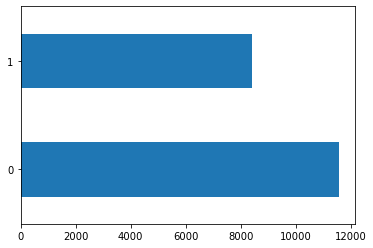

In [10]:
valueCounts_y = main_dataset.value_counts(main_dataset['DramaGenre'].values, sort=True)
valueCounts_y.plot.barh()

# Step 3 : Splitting the data into Train and Test Sets 

<p>Following steps performed below:
    <ul>
        <li>First, from the main_dataset the Independent(movie_Id,story) and Dependent variables(DramaGenre) are separted</li>
        <li>Printing the shape of our Training and Test data</li>
</ul>

In [13]:
#importing required libraries
from sklearn.model_selection import train_test_split

#Defining the Independent varible X, which will contain movie_Id and story
X = main_dataset.iloc[:, :-1].values
 
#Defining the Dependent variable y, which will contain DramaGenre
y = main_dataset.iloc[:, -1].values

#printing the shape of train and test samples
print("Shape of training data: ",X.shape )
print("Shape of training class data: ",y.shape )

Shape of training data:  (20000, 2)
Shape of training class data:  (20000,)


# Step 4 : Data Preprocessing 

We are removing some Irreguler text and Punctuations using Reguler Expressions(Regex)

In [14]:
#importing required libraries
#re is needed for using reguler expressions which would be used to remove certain parts of the text(story)
import re

#assiging main_dataset to a temporary variable
temp=main_dataset

#had to remove some weird text in the text like \xe2\x80\x98Yinzer\xe2\x80\x99, \xe2\x80\x99
temp['story'] = temp['story'].str.replace(r'\\[^\Ws]+', '', regex=True)
#removing punctuations
temp['story'] = temp['story'].str.replace(r'[^\w\s]', '', regex=True)

temp.head()

,movie_id,story,DramaGenre
0,131072,A girl who always tends to fall in love with t...,0
1,196609,Bigfoot has come to the town of Ellwood City P...,0
2,131074,At an altitude of 18000 feet Alaskas Mount St ...,0
3,196611,In her first special since 2003 Ellen revisits...,0
4,196613,Mike and Sulley are back at Monsters Universit...,0


# Flow for the Project
<ul>
    <li>We have four Text Analysis Technique Bag Of Words, TF-IDF, Topic Modelling Modelling and Word Embedding</li>
    <li>For each technique above we would perform 4 iterations performing different steps that will be explained below</li>
    <li>We would use three Supervised models for generating the best Predictive model i.e Logistic Regression, Stochastic Gradient Descent and Multinomial Naive Bayes</li>
</ul>

# Step 5 : Text Analysis & Selecting the Best Models

### 1. Bag of Words 
<ul> We have perfomed 4 iterations for the Bag of Words. In each iteration different steps were performed to make the model better which is discussed below:
<li><b>Iteration 1 :</b>Firstly, the uncessary text was removed in the 'story' column using Regex. Then trigrams were generated and three model i.e. Logistic Regression, Stochastic Gradient Descent and Multinomial Naive Bayes were used for prediction.The hyperparameter 'class_weight' was used for balancing.</li>
    <li><b>Iteration 2 :</b>In addition to all the steps above, the Stopwords were removed and the models were run to see if there is any improvement or not</li>
    <li><b>Iteration 3 :</b>The best hyperparameters for our models were generated using GridSearch Cross Validation. And, then the models were trained using the best hyperparameters</li>
    <li><b>Iteration 4 :</b>Lastly, Lemmatization was performed, that would coonvert any words such as 'laughing' to 'laugh' and then models were trained again to evaluate the results</li>
</ul>

## Iteration 1:
<p> In this iteration, we would use the cleaned data and then we just calculate the trigrams and the rest, all the models are being implemented with their default settings</p>

In [15]:
#removing the movie_Id and DramaGenre from our training data because that is not needed, we only need story
x = temp['story']

In [16]:
#Initializing the Bag of Words Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer 
vect = CountVectorizer(ngram_range=(1,3),lowercase=False)
%time vect.fit(x)
vect.vocabulary_

CPU times: user 4.2 s, sys: 160 ms, total: 4.36 s
Wall time: 4.39 s


{'girl': 625156,
 'who': 1280514,
 'always': 293420,
 'tends': 1106546,
 'to': 1191555,
 'fall': 560646,
 'in': 714038,
 'love': 803676,
 'with': 1293117,
 'the': 1116944,
 'wrong': 1315134,
 'guy': 639942,
 'meets': 823464,
 'one': 914865,
 'believes': 389523,
 'world': 1309812,
 'is': 747169,
 'coming': 456697,
 'an': 295373,
 'end': 536578,
 'next': 861289,
 'Tuesday': 243857,
 'girl who': 626182,
 'who always': 1280683,
 'always tends': 293764,
 'tends to': 1106551,
 'to fall': 1199882,
 'fall in': 560721,
 'in love': 722809,
 'love with': 805315,
 'with the': 1301179,
 'the wrong': 1162103,
 'wrong guy': 1315288,
 'guy meets': 640071,
 'meets one': 824250,
 'one who': 916967,
 'who believes': 1281001,
 'believes the': 389643,
 'the world': 1161603,
 'world is': 1310830,
 'is coming': 749928,
 'coming to': 456804,
 'to an': 1194666,
 'an end': 298228,
 'end next': 536738,
 'next Tuesday': 861336,
 'girl who always': 626185,
 'who always tends': 1280687,
 'always tends to': 293765,


In [17]:
#Fitting and generating a Sparse Matrix for the data
x = vect.transform(temp['story'])
#Printing the result of the Sparse Matrix
x

<20000x1324029 sparse matrix of type '<class 'numpy.int64'>'
	with 2796499 stored elements in Compressed Sparse Row format>

In [18]:
#importing required libraries for modelling
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split

#Initializing the models
logreg_model = LogisticRegression(max_iter=2000,class_weight='balanced')
SGD_model = SGDClassifier(class_weight='balanced')
NB_model = MultinomialNB()

#Splitting the data into train/test with a 70/30 split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

#fitting our models
logreg_model.fit(X_train,y_train)
SGD_model.fit(X_train,y_train)
NB_model.fit(X_train,y_train)

#Predicting the models
y_test_hat_logreg=logreg_model.predict(X_test)
y_test_hat_SGD=SGD_model.predict(X_test)
y_test_hat_NB=NB_model.predict(X_test)

#Calculating Accuracy, Precision and Recall scores
#For Logistic Regression
acc_logreg=round(accuracy_score(y_test,y_test_hat_logreg)*100,2)
prec_logreg=round(precision_score(y_test,y_test_hat_logreg)*100,2)
recall_logreg=round(recall_score(y_test,y_test_hat_logreg)*100,2)
f1_logreg=round(f1_score(y_test,y_test_hat_logreg)*100,2)

#For SGD
acc_SGD=round(accuracy_score(y_test,y_test_hat_SGD)*100,2)
prec_SGD=round(precision_score(y_test,y_test_hat_SGD)*100,2)
recall_SGD=round(recall_score(y_test,y_test_hat_SGD)*100,2)
f1_SGD=round(f1_score(y_test,y_test_hat_SGD)*100,2)

#For Naive Bayes
acc_NB=round(accuracy_score(y_test,y_test_hat_NB)*100,2)
prec_NB=round(precision_score(y_test,y_test_hat_NB)*100,2)
recall_NB=round(recall_score(y_test,y_test_hat_NB)*100,2)
f1_NB=round(f1_score(y_test,y_test_hat_NB)*100,2)


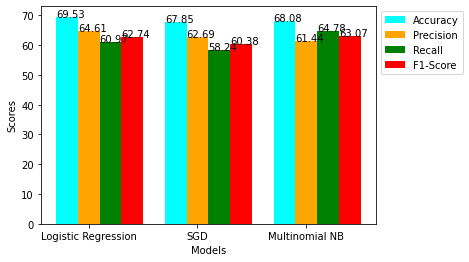

In [19]:
#Visualizing the results 
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# arranging the data
x = np.arange(3)
y1 = [acc_logreg, acc_SGD, acc_NB]
y2 = [prec_logreg, prec_SGD, prec_NB]
y3 = [recall_logreg, recall_SGD, recall_NB]
y4 = [f1_logreg, f1_SGD, f1_NB]
width = 0.2
  
# plot data in grouped manner of bar type
bars=plt.bar(x-0.2, y1, width, color='cyan')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x, y2, width, color='orange')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.2, y3, width, color='green')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.4, y4, width, color='red')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.xticks(x, ['Logistic Regression', 'SGD', 'Multinomial NB'])
plt.xlabel("Models")
plt.ylabel("Scores")
plt.legend(["Accuracy", "Precision", "Recall","F1-Score"],loc="best", bbox_to_anchor=(1, 1))

plt.show()

From the above results, we can see that all the models are performing well with an accuracy in the range of 67-69%. But, overall Multinomial NB is having an F1 Score of 63% and Logistic Regression has 62% so Multinomial NB is performing better. The precision and recall for both the models are also fairly good. But, Multinomial NB is performing badly by looking at it's Precision i.e 61%. We have plotted the Confusion matrix below which would give us a better idea of which target variable from 0(Not a Drama Genre) and 1(has a Drame Genre) is it confusing

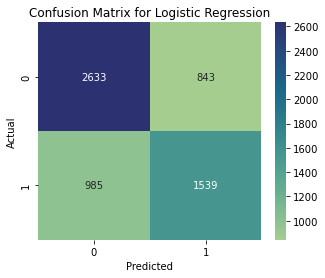

In [23]:
#Generating Confusion matrix
#importing libraries
import pandas as pd
import seaborn as sns
#Confusion Matrix
conf_matrix=pd.crosstab(pd.Series(y_test,name='Actual'),pd.Series(y_test_hat_logreg,name='Predicted'))
plt.figure(figsize=(5,4))
plt.title("Confusion Matrix for Logistic Regression")
sns.heatmap(conf_matrix,cmap='crest',annot=True,fmt='g')
plt.show()

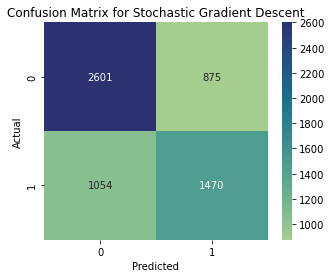

In [24]:
#Generating Confusion matrix
#importing libraries
import pandas as pd
import seaborn as sns
#Confusion Matrix
conf_matrix=pd.crosstab(pd.Series(y_test,name='Actual'),pd.Series(y_test_hat_SGD,name='Predicted'))
plt.figure(figsize=(5,4))
plt.title("Confusion Matrix for Stochastic Gradient Descent")
sns.heatmap(conf_matrix,cmap='crest',annot=True,fmt='g')
plt.show()

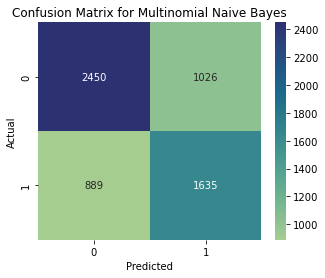

In [25]:
#Generating Confusion matrix
#importing libraries
import pandas as pd
import seaborn as sns
#Confusion Matrix
conf_matrix=pd.crosstab(pd.Series(y_test,name='Actual'),pd.Series(y_test_hat_NB,name='Predicted'))
plt.figure(figsize=(5,4))
plt.title("Confusion Matrix for Multinomial Naive Bayes")
sns.heatmap(conf_matrix,cmap='crest',annot=True,fmt='g')
plt.show()

<ul>Looking at the above confusion matrix we can see:
    <li>Both Logistic Regression and Multinomial NB the True Positive and the True Negatives are in a similer range and are performing good</li>
    <li>On the other hand, SGD is also performing good but not as good as the other two, having a True Positive rate of 2601 while the False Positive rate is 1054. But the True Negative rate is also good </li>
    <li>We will further see if we can improve the results or not</li>
    </ul>

## Iteration 2:
<p>In this Iteration, we are generating the trigrams and removing the stopwards and checking the results of our models. At the same time we are using the cleaned data that is clean from all the punctuations and irreguler text</p>

In [26]:
#removing the movie_Id and DramaGenre from our training data because that is not needed, we only need story
x = temp['story']

In [28]:
#Initializing the Bag of Words Count Vectorizer 
vect = CountVectorizer(ngram_range=(1,3),lowercase=False,stop_words="english",max_features = 10000)
#Fitting and generating a Sparse Matrix for the data
vect.fit(temp['story'])
vect.vocabulary_

{'girl': 5318,
 'fall': 4845,
 'love': 6397,
 'wrong': 9920,
 'guy': 5459,
 'meets': 6599,
 'believes': 3023,
 'world': 9874,
 'coming': 3630,
 'end': 4580,
 'fall love': 4847,
 'Bigfoot': 430,
 'come': 3605,
 'town': 9245,
 'City': 588,
 'causing': 3355,
 'problems': 7533,
 'Now': 1656,
 'locals': 6333,
 'campaign': 3276,
 'filmed': 5025,
 'LA': 1323,
 'Filmmaker': 847,
 'hometown': 5670,
 'hero': 5585,
 'Show': 1975,
 'assembled': 2814,
 'colorful': 3598,
 'cast': 3332,
 'characters': 3415,
 'region': 7850,
 'bring': 3191,
 'vision': 9647,
 'life': 6236,
 'The': 2130,
 'movie': 6777,
 'features': 4946,
 'famous': 4884,
 'best': 3035,
 'loved': 6415,
 'celebrities': 3363,
 'like': 6281,
 'Pittsburgh': 1754,
 'Dad': 652,
 'Americas': 268,
 'Next': 1623,
 'Top': 2254,
 'Jim': 1223,
 'standup': 8700,
 'comic': 3626,
 'morning': 6749,
 'Mike': 1514,
 'veteran': 9609,
 'news': 6912,
 'anchor': 2692,
 'In': 1100,
 'flick': 5089,
 'guns': 5457,
 'beer': 2996,
 'supply': 8902,
 'right': 8028,

In [29]:
#Fitting and generating a Sparse Matrix for the data
bag_of_words = vect.transform(x)
#printing the results for the Sparse Matrix
bag_of_words

<20000x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 487232 stored elements in Compressed Sparse Row format>

In [30]:
#importing required libraries for modelling
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split

#Initializing the models
logreg_model = LogisticRegression(max_iter=2000,class_weight='balanced')
SGD_model = SGDClassifier(class_weight='balanced')
NB_model = MultinomialNB()

#Splitting the data into train/test with a 70/30 split
X_train,X_test,y_train,y_test=train_test_split(bag_of_words,y,test_size=0.3,random_state=0,stratify=y)

#fitting our models
logreg_model.fit(X_train,y_train)
SGD_model.fit(X_train,y_train)
NB_model.fit(X_train,y_train)

#Predicting the models
y_test_hat_logreg=logreg_model.predict(X_test)
y_test_hat_SGD=SGD_model.predict(X_test)
y_test_hat_NB=NB_model.predict(X_test)

#Calculating Accuracy, Precision and Recall scores
#For Logistic Regression
acc_logreg=round(accuracy_score(y_test,y_test_hat_logreg)*100,2)
prec_logreg=round(precision_score(y_test,y_test_hat_logreg)*100,2)
recall_logreg=round(recall_score(y_test,y_test_hat_logreg)*100,2)
f1_logreg=round(f1_score(y_test,y_test_hat_logreg)*100,2)

#For SGD
acc_SGD=round(accuracy_score(y_test,y_test_hat_SGD)*100,2)
prec_SGD=round(precision_score(y_test,y_test_hat_SGD)*100,2)
recall_SGD=round(recall_score(y_test,y_test_hat_SGD)*100,2)
f1_SGD=round(f1_score(y_test,y_test_hat_SGD)*100,2)

#For Naive Bayes
acc_NB=round(accuracy_score(y_test,y_test_hat_NB)*100,2)
prec_NB=round(precision_score(y_test,y_test_hat_NB)*100,2)
recall_NB=round(recall_score(y_test,y_test_hat_NB)*100,2)
f1_NB=round(f1_score(y_test,y_test_hat_NB)*100,2)


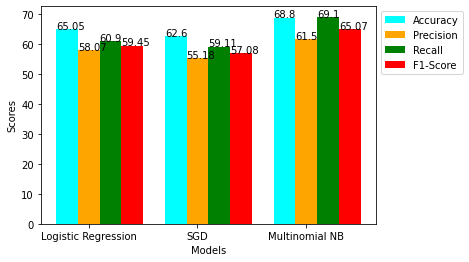

In [31]:
#Visualizing the results 
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# arranging the data
x = np.arange(3)
y1 = [acc_logreg, acc_SGD, acc_NB]
y2 = [prec_logreg, prec_SGD, prec_NB]
y3 = [recall_logreg, recall_SGD, recall_NB]
y4 = [f1_logreg, f1_SGD, f1_NB]
width = 0.2
  
# plot data in grouped manner of bar type
bars=plt.bar(x-0.2, y1, width, color='cyan')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x, y2, width, color='orange')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.2, y3, width, color='green')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.4, y4, width, color='red')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.xticks(x, ['Logistic Regression', 'SGD', 'Multinomial NB'])
plt.xlabel("Models")
plt.ylabel("Scores")
plt.legend(["Accuracy", "Precision", "Recall","F1-Score"],loc="best", bbox_to_anchor=(1, 1))

plt.show()

From the above results, we can see that the results for Logistic Regression and SGD have gone down. But, overall Multinomial Naive Bayes is still performing good,  having an F1 Score of 65%. The precision and recall is also better then the other two. The confusion matrix below will also give a good idea

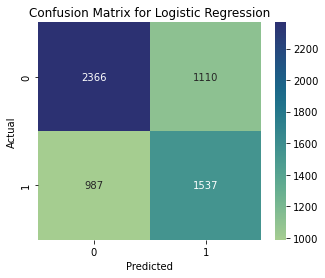

In [32]:
#Generating Confusion matrix
#importing libraries
import pandas as pd
import seaborn as sns
#Confusion Matrix
conf_matrix=pd.crosstab(pd.Series(y_test,name='Actual'),pd.Series(y_test_hat_logreg,name='Predicted'))
plt.figure(figsize=(5,4))
plt.title("Confusion Matrix for Logistic Regression")
sns.heatmap(conf_matrix,cmap='crest',annot=True,fmt='g')
plt.show()

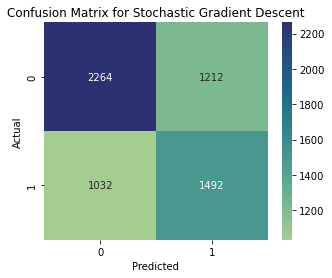

In [33]:
#Generating Confusion matrix
#importing libraries
import pandas as pd
import seaborn as sns
#Confusion Matrix
conf_matrix=pd.crosstab(pd.Series(y_test,name='Actual'),pd.Series(y_test_hat_SGD,name='Predicted'))
plt.figure(figsize=(5,4))
plt.title("Confusion Matrix for Stochastic Gradient Descent")
sns.heatmap(conf_matrix,cmap='crest',annot=True,fmt='g')
plt.show()

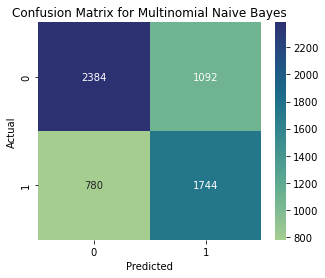

In [34]:
#Generating Confusion matrix
#importing libraries
import pandas as pd
import seaborn as sns
#Confusion Matrix
conf_matrix=pd.crosstab(pd.Series(y_test,name='Actual'),pd.Series(y_test_hat_NB,name='Predicted'))
plt.figure(figsize=(5,4))
plt.title("Confusion Matrix for Multinomial Naive Bayes")
sns.heatmap(conf_matrix,cmap='crest',annot=True,fmt='g')
plt.show()

<ul>
<li>The results for the Logistic Regression and SDG went down. They are not performing that well</li>
<li>For Multinomial Naive Bayes, the True Positive rate decreased a little and the False Positive rate went up and the True Negative rate went up and False Negative rate decreased. So overall, the model is having a tough time with correctly predicting the movies with the Drama Genre</li></ul>

## Iteration 3
<p>After, generating Trigrams, removing stopwords. The Models did improve a little, but now generating the best hyperparameters for the models to see the if the results will improve or not</p>

<b>1. Finding the best parameters for Logistic Regression</b>

In [35]:
#Using GridSearchCV to tune the hyperparameters of our model and find the best one
#importing libraries
from sklearn.model_selection import GridSearchCV,StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

# parameter grid
#C is a regularization paramters which will penalize the extreme values, because extreme values leads to overfitting
#solver is basically the optimizer
parameters = { 
    'C'       : [0.5,0.01,0.1,1,10,100,500,1000]
}

#Initializing the model
logreg_model=LogisticRegression(max_iter=1000,class_weight='balanced')

#Initializing the classifier
cv=StratifiedKFold(n_splits=5,random_state=0,shuffle=True)#will run the model for 10 times by dividing the data into 10 equal parts. In each split, 1 part would be used for testing and the rest of it would be used for training
classifier = GridSearchCV(logreg_model,       # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=cv)                     # number of folds

#Fitting our data to GridSearchCV Classifier and printing the best parameters and accuracy of the model with the best parameters
classifier.fit(X_train,y_train)
print("Best Parameters :",classifier.best_params_)
print("Accuracy :",classifier.best_score_)

Best Parameters : {'C': 0.1}
Accuracy : 0.6799285714285714


<b>2. Finding the best parameters for Multinomial Naive Bayes</b>

In [36]:
import warnings
warnings.filterwarnings('ignore')

#Grid Search with Stratified KFold

#defining the model
NB_model = MultinomialNB()

#defining the dictionary for the parameters parameters
#we have one hyperparameters here i.e alpha which is basically a smoothing parameters
parameters={'alpha':[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1,10,50,100]} 
cv=StratifiedKFold(n_splits=5,random_state=0,shuffle=True)
classifier=GridSearchCV(NB_model,parameters,cv=cv,scoring='accuracy',return_train_score=False)

#fitting on the GridSearchCV classifier
classifier.fit(X_train,y_train)

#Printing Best Parameters and Accuracy
print("Best Parameter :", classifier.best_params_)
print("Accuracy :", classifier.best_score_)

Best Parameter : {'alpha': 0.9}
Accuracy : 0.6848571428571428


<b>3. Finding the best parameters for Stochastic Gradient Descent</b>

In [37]:
import warnings
warnings.filterwarnings('ignore')

#initializing the model
SGD=SGDClassifier(class_weight='balanced')

#defining the dictionary for the parameters
#we have three hyperparameters here i.e max_iter,alpha, and loss
parameters={'max_iter' : [100,200,300,400,500,1000],
            'alpha' : [0.0001,0.001,0.01,0.1,0.05,0.5,1,10,50,100],
            'loss' : ['hinge','log_loss']
           } 
cv=StratifiedKFold(n_splits=5,random_state=0,shuffle=True)
classifier=GridSearchCV(SGD,parameters,cv=cv,scoring='accuracy',return_train_score=False)

#fitting on the GridSearchCV classifier
classifier.fit(X_train,y_train)

print("Best Parameter :", classifier.best_params_)
print("Accuracy :", classifier.best_score_)

Best Parameter : {'alpha': 0.01, 'loss': 'hinge', 'max_iter': 300}
Accuracy : 0.679142857142857


<b>Running all the models with the best hyperparameters and evaluating the results</b>

In [39]:
#removing the movie_Id and DramaGenre from our training data because that is not needed, we only need story
x = temp['story']

In [40]:
#Initializing the Bag of Words Count Vectorizer 
vect = CountVectorizer(ngram_range=(1,3),lowercase=False,stop_words="english",max_features = 10000)
#Fitting and generating a Sparse Matrix for the data
vect.fit(temp['story'])
vect.vocabulary_

{'girl': 5318,
 'fall': 4845,
 'love': 6397,
 'wrong': 9920,
 'guy': 5459,
 'meets': 6599,
 'believes': 3023,
 'world': 9874,
 'coming': 3630,
 'end': 4580,
 'fall love': 4847,
 'Bigfoot': 430,
 'come': 3605,
 'town': 9245,
 'City': 588,
 'causing': 3355,
 'problems': 7533,
 'Now': 1656,
 'locals': 6333,
 'campaign': 3276,
 'filmed': 5025,
 'LA': 1323,
 'Filmmaker': 847,
 'hometown': 5670,
 'hero': 5585,
 'Show': 1975,
 'assembled': 2814,
 'colorful': 3598,
 'cast': 3332,
 'characters': 3415,
 'region': 7850,
 'bring': 3191,
 'vision': 9647,
 'life': 6236,
 'The': 2130,
 'movie': 6777,
 'features': 4946,
 'famous': 4884,
 'best': 3035,
 'loved': 6415,
 'celebrities': 3363,
 'like': 6281,
 'Pittsburgh': 1754,
 'Dad': 652,
 'Americas': 268,
 'Next': 1623,
 'Top': 2254,
 'Jim': 1223,
 'standup': 8700,
 'comic': 3626,
 'morning': 6749,
 'Mike': 1514,
 'veteran': 9609,
 'news': 6912,
 'anchor': 2692,
 'In': 1100,
 'flick': 5089,
 'guns': 5457,
 'beer': 2996,
 'supply': 8902,
 'right': 8028,

In [41]:
#Fitting and generating a Sparse Matrix for the data
bag_of_words = vect.transform(x)
#printing the results for the Sparse Matrix
bag_of_words

<20000x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 487232 stored elements in Compressed Sparse Row format>

In [43]:
#importing required libraries for modelling
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

#Initializing the models with the best hyperparameters
logreg_model = LogisticRegression(max_iter=1000,C=0.1,class_weight='balanced')
SGD_model = SGDClassifier(alpha=0.001,loss='hinge',max_iter=300,class_weight='balanced')
NB_model = MultinomialNB(alpha=0.9)

#Splitting the data into train/test with a 70/30 split
X_train,X_test,y_train,y_test=train_test_split(bag_of_words,y,test_size=0.3,random_state=0,stratify=y)

#fitting our models
logreg_model.fit(X_train,y_train)
SGD_model.fit(X_train,y_train)
NB_model.fit(X_train,y_train)

#Predicting the models
y_test_hat_logreg=logreg_model.predict(X_test)
y_test_hat_SGD=SGD_model.predict(X_test)
y_test_hat_NB=NB_model.predict(X_test)

#Calculating Accuracy, Precision and Recall scores
#For Logistic Regression
acc_logreg=round(accuracy_score(y_test,y_test_hat_logreg)*100,2)
prec_logreg=round(precision_score(y_test,y_test_hat_logreg)*100,2)
recall_logreg=round(recall_score(y_test,y_test_hat_logreg)*100,2)
f1_logreg=round(f1_score(y_test,y_test_hat_logreg)*100,2)

#For SGD
acc_SGD=round(accuracy_score(y_test,y_test_hat_SGD)*100,2)
prec_SGD=round(precision_score(y_test,y_test_hat_SGD)*100,2)
recall_SGD=round(recall_score(y_test,y_test_hat_SGD)*100,2)
f1_SGD=round(f1_score(y_test,y_test_hat_SGD)*100,2)

#For Naive Bayes
acc_NB=round(accuracy_score(y_test,y_test_hat_NB)*100,2)
prec_NB=round(precision_score(y_test,y_test_hat_NB)*100,2)
recall_NB=round(recall_score(y_test,y_test_hat_NB)*100,2)
f1_NB=round(f1_score(y_test,y_test_hat_NB)*100,2)


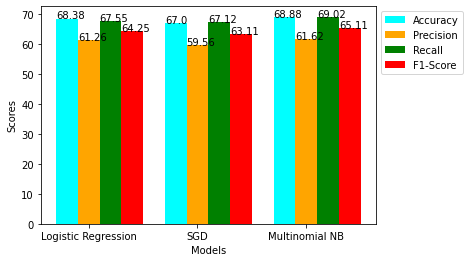

In [44]:
#Visualizing the results 
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# arranging the data
x = np.arange(3)
y1 = [acc_logreg, acc_SGD, acc_NB]
y2 = [prec_logreg, prec_SGD, prec_NB]
y3 = [recall_logreg, recall_SGD, recall_NB]
y4 = [f1_logreg, f1_SGD, f1_NB]
width = 0.2
  
# plot data in grouped manner of bar type
bars=plt.bar(x-0.2, y1, width, color='cyan')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x, y2, width, color='orange')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.2, y3, width, color='green')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.4, y4, width, color='red')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.xticks(x, ['Logistic Regression', 'SGD', 'Multinomial NB'])
plt.xlabel("Models")
plt.ylabel("Scores")
plt.legend(["Accuracy", "Precision", "Recall","F1-Score"],loc="best", bbox_to_anchor=(1, 1))

plt.show()

The results for Logistic Regression and SGD are almost the same as the first iteration after executing the models with the best Hyperparameters.

## Iteration 4
<p>Lastly, I will try Lemmitization in addition to all the other steps performed in the earlier iterations, and see whether it improves the results or not</p>

In [ ]:
#installing spacy
#import sys
#!{sys.executable} -m pip install spacy
#!{sys.executable} -m spacy download en

In [47]:
#Initializing the lemmatizer, we are using spacy for lemmatization instead of NLTK because Spacy is new and performs better
#lemmatization
import spacy
lemmatizer=spacy.load('en_core_web_sm')

#defining tokenizer
def my_tokenizer(doc):
    tokens=lemmatizer(doc)
    return([tokens.lemma_ for tokens in tokens])

#defining out own preprocessor that will convert everything to lowercase
def my_proprocessor(doc):
    return(doc.lower())

In [48]:
#applying lemmatiztion to our data
temp['story'] = temp.story.apply(my_tokenizer)

In [49]:
#converting the lemmatized data from a list to string
temp["story"] = temp["story"].apply(lambda x: str(x))

In [50]:
#removing punctuations i.e brackets [] and commas after converting a list to string.
temp['story'] = temp['story'].str.replace(r'[^\w\s]', '', regex=True)

In [51]:
x = temp['story']

In [52]:
from sklearn.feature_extraction.text import CountVectorizer 
vect = CountVectorizer(ngram_range=(1,3),lowercase=False,stop_words="english",max_features = 20000)
vect.fit(temp['story'])
vect.vocabulary_

{'girl': 10172,
 'tend': 18016,
 'fall': 9080,
 'love': 12717,
 'wrong': 19790,
 'guy': 10474,
 'meet': 13215,
 'believe': 5684,
 'world': 19669,
 'come': 6746,
 'end': 8544,
 'Tuesday': 4245,
 'fall love': 9093,
 'love wrong': 12788,
 'wrong guy': 19791,
 'guy meet': 10477,
 'world come': 19679,
 'come end': 6762,
 'Bigfoot': 764,
 'town': 18365,
 'City': 1087,
 'cause': 6305,
 'BIG': 659,
 'problem': 15127,
 'local': 12567,
 'fund': 10020,
 'campaign': 6166,
 'film': 9450,
 'LA': 2580,
 'Filmmaker': 1676,
 'hometown': 10923,
 'hero': 10731,
 'Jared': 2226,
 'Show': 3889,
 'assemble': 5218,
 'colorful': 6730,
 'cast': 6268,
 'character': 6398,
 'region': 15657,
 'bring': 6000,
 'vision': 19206,
 'life': 12132,
 'movie': 13575,
 'feature': 9330,
 'famous': 9214,
 'celebrity': 6320,
 'like': 12402,
 'Pittsburgh': 3461,
 'Dad': 1265,
 'Americas': 479,
 'Next': 3223,
 'Top': 4206,
 'Jim': 2287,
 'standup': 17267,
 'comic': 6843,
 'morning': 13504,
 'Mike': 3014,
 'veteran': 19131,
 'news'

In [53]:
bag_of_words_lemma = vect.transform(temp['story'])
bag_of_words_lemma

<20000x20000 sparse matrix of type '<class 'numpy.int64'>'
	with 530862 stored elements in Compressed Sparse Row format>

In [54]:
#importing required libraries for modelling
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

#Initializing the models with the best hyperparameters
logreg_model = LogisticRegression(max_iter=1000,C=0.1,class_weight='balanced')
SGD_model = SGDClassifier(alpha=0.001,loss='hinge',max_iter=300,class_weight='balanced')
NB_model = MultinomialNB(alpha=0.9)

#Splitting the data into train/test with a 70/30 split
X_train,X_test,y_train,y_test=train_test_split(bag_of_words_lemma,y,test_size=0.3,random_state=0,stratify=y)

#fitting our models
logreg_model.fit(X_train,y_train)
SGD_model.fit(X_train,y_train)
NB_model.fit(X_train,y_train)

#Predicting the models
y_test_hat_logreg=logreg_model.predict(X_test)
y_test_hat_SGD=SGD_model.predict(X_test)
y_test_hat_NB=NB_model.predict(X_test)

#Calculating Accuracy, Precision and Recall scores
#For Logistic Regression
acc_logreg=round(accuracy_score(y_test,y_test_hat_logreg)*100,2)
prec_logreg=round(precision_score(y_test,y_test_hat_logreg)*100,2)
recall_logreg=round(recall_score(y_test,y_test_hat_logreg)*100,2)
f1_logreg=round(f1_score(y_test,y_test_hat_logreg)*100,2)

#For SGD
acc_SGD=round(accuracy_score(y_test,y_test_hat_SGD)*100,2)
prec_SGD=round(precision_score(y_test,y_test_hat_SGD)*100,2)
recall_SGD=round(recall_score(y_test,y_test_hat_SGD)*100,2)
f1_SGD=round(f1_score(y_test,y_test_hat_SGD)*100,2)

#For Naive Bayes
acc_NB=round(accuracy_score(y_test,y_test_hat_NB)*100,2)
prec_NB=round(precision_score(y_test,y_test_hat_NB)*100,2)
recall_NB=round(recall_score(y_test,y_test_hat_NB)*100,2)
f1_NB=round(f1_score(y_test,y_test_hat_NB)*100,2)


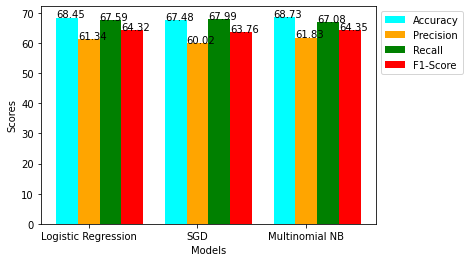

In [55]:
#Visualizing the results 
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# arranging the data
x = np.arange(3)
y1 = [acc_logreg, acc_SGD, acc_NB]
y2 = [prec_logreg, prec_SGD, prec_NB]
y3 = [recall_logreg, recall_SGD, recall_NB]
y4 = [f1_logreg, f1_SGD, f1_NB]
width = 0.2
  
# plot data in grouped manner of bar type
bars=plt.bar(x-0.2, y1, width, color='cyan')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x, y2, width, color='orange')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.2, y3, width, color='green')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.4, y4, width, color='red')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.xticks(x, ['Logistic Regression', 'SGD', 'Multinomial NB'])
plt.xlabel("Models")
plt.ylabel("Scores")
plt.legend(["Accuracy", "Precision", "Recall","F1-Score"],loc="best", bbox_to_anchor=(1, 1))

plt.show()

Looking at the above results, after performing lemmatization the results improved a little for Logistic Regression adn SGD but for Multinomial Naive Bayes it decreased a little

###  2. Term Frequency - Inverse Document Frequency(TF-IDF)
<ul> We have perfomed 4 iterations for the TF-IDF Vectorizer. In each iteration different steps were performed to make the model better which is discussed below:
<li><b>Iteration 1 :</b>Firstly, the uncessary text was removed in the 'story' column using Regex. Then trigrams were generated and three model i.e. Logistic Regression, Stochastic Gradient Descent and Multinomial Naive Bayes were used for prediction.The hyperparameter 'class_weight' was used for balancing.</li>
    <li><b>Iteration 2 :</b>In addition to all the steps above, the Stopwords were removed and the models were run to see if there is any improvement or not</li>
    <li><b>Iteration 3 :</b>The best hyperparameters for our models were generated using GridSearch Cross Validation. And, then the models were trained using the best hyperparameters</li>
    <li><b>Iteration 4 :</b>Lastly, Lemmatization was performed, that would coonvert any words such as 'laughing' to 'laugh' and then models were trained again to evaluate the results</li>
</ul>

In [57]:
#importing TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

## Iteration 1:
<p> In this iteration, first we remove the unnecessary text and then we just calcule the trigrams and the rest, all the models are being implemented with their default settings</p>

In [58]:
#importing required libraries
#re is needed for using reguler expressions which would be used to remove certain parts of the text(story)
import re

#assiging main_dataset to a temporary variable
temp=main_dataset

#had to remove some weird text in the text like \xe2\x80\x98Yinzer\xe2\x80\x99, \xe2\x80\x99
temp['story'] = temp['story'].str.replace(r'\\[^\Ws]+', '', regex=True)
#removing punctuations
temp['story'] = temp['story'].str.replace(r'[^\w\s]', '', regex=True)

#removing the movie_Id and DramaGenre from our training data because that is not needed, we only need story
X_final= temp.iloc[:, 1].values

#Initializing the TF-IDF Vectorizor
vect=TfidfVectorizer(ngram_range=(1,3))

#Fitting and generating a Sparse Matrix for the data
x=vect.fit_transform(X_final)

In [61]:
#importing required libraries for modelling
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

#Initializing the models
logreg_model = LogisticRegression(max_iter=1000,class_weight='balanced')
SGD_model = SGDClassifier(class_weight='balanced')
NB_model = MultinomialNB()

#Splitting the data into train/test with a 70/30 split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

#fitting our models
logreg_model.fit(X_train,y_train)
SGD_model.fit(X_train,y_train)
NB_model.fit(X_train,y_train)

#Predicting the models
y_test_hat_logreg=logreg_model.predict(X_test)
y_test_hat_SGD=SGD_model.predict(X_test)
y_test_hat_NB=NB_model.predict(X_test)

#Calculating Accuracy, Precision and Recall scores
#For Logistic Regression
acc_logreg=round(accuracy_score(y_test,y_test_hat_logreg)*100,2)
prec_logreg=round(precision_score(y_test,y_test_hat_logreg)*100,2)
recall_logreg=round(recall_score(y_test,y_test_hat_logreg)*100,2)
f1_logreg=round(f1_score(y_test,y_test_hat_logreg)*100,2)

#For SGD
acc_SGD=round(accuracy_score(y_test,y_test_hat_SGD)*100,2)
prec_SGD=round(precision_score(y_test,y_test_hat_SGD)*100,2)
recall_SGD=round(recall_score(y_test,y_test_hat_SGD)*100,2)
f1_SGD=round(f1_score(y_test,y_test_hat_SGD)*100,2)

#For Naive Bayes
acc_NB=round(accuracy_score(y_test,y_test_hat_NB)*100,2)
prec_NB=round(precision_score(y_test,y_test_hat_NB)*100,2)
recall_NB=round(recall_score(y_test,y_test_hat_NB)*100,2)
f1_NB=round(f1_score(y_test,y_test_hat_NB)*100,2)


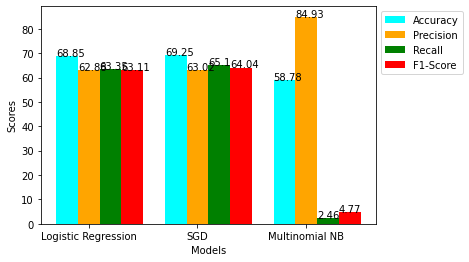

In [62]:
#Visualizing the results 
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# arranging the data
x = np.arange(3)
y1 = [acc_logreg, acc_SGD, acc_NB]
y2 = [prec_logreg, prec_SGD, prec_NB]
y3 = [recall_logreg, recall_SGD, recall_NB]
y4 = [f1_logreg, f1_SGD, f1_NB]
width = 0.2
  
# plot data in grouped manner of bar type
bars=plt.bar(x-0.2, y1, width, color='cyan')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x, y2, width, color='orange')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.2, y3, width, color='green')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.4, y4, width, color='red')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.xticks(x, ['Logistic Regression', 'SGD', 'Multinomial NB'])
plt.xlabel("Models")
plt.ylabel("Scores")
plt.legend(["Accuracy", "Precision", "Recall","F1-Score"],loc="best", bbox_to_anchor=(1, 1))

plt.show()

From the above results, we can see that Logistic Regression and SGD have almost the same performance. But, overall SGD is having an F1 Score of 64% and Logistic Regression has 63% so SGD is performing better. The precision and recall for both the models are also fairly good. But, Multinomial NB is performing very badly by looking at it's Precision and Recall of 84% and almost 3%. We have plotted the Confusion matrix below which would give us a better idea of which target variable from 0(Not a Drama Genre) and 1(has a Drame Genre) is it confusing

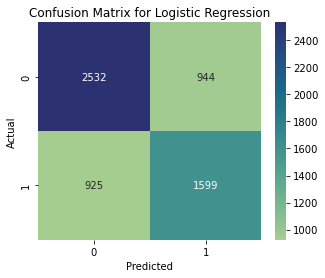

In [63]:
#Generating Confusion matrix
#importing libraries
import pandas as pd
import seaborn as sns
#Confusion Matrix
conf_matrix=pd.crosstab(pd.Series(y_test,name='Actual'),pd.Series(y_test_hat_logreg,name='Predicted'))
plt.figure(figsize=(5,4))
plt.title("Confusion Matrix for Logistic Regression")
sns.heatmap(conf_matrix,cmap='crest',annot=True,fmt='g')
plt.show()

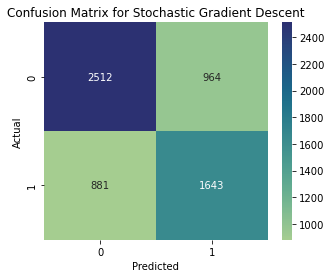

In [64]:
#Generating Confusion matrix
#importing libraries
import pandas as pd
import seaborn as sns
#Confusion Matrix
conf_matrix=pd.crosstab(pd.Series(y_test,name='Actual'),pd.Series(y_test_hat_SGD,name='Predicted'))
plt.figure(figsize=(5,4))
plt.title("Confusion Matrix for Stochastic Gradient Descent")
sns.heatmap(conf_matrix,cmap='crest',annot=True,fmt='g')
plt.show()

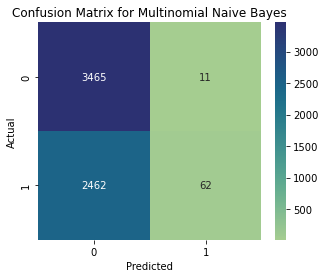

In [65]:
#Generating Confusion matrix
#importing libraries
import pandas as pd
import seaborn as sns
#Confusion Matrix
conf_matrix=pd.crosstab(pd.Series(y_test,name='Actual'),pd.Series(y_test_hat_NB,name='Predicted'))
plt.figure(figsize=(5,4))
plt.title("Confusion Matrix for Multinomial Naive Bayes")
sns.heatmap(conf_matrix,cmap='crest',annot=True,fmt='g')
plt.show()

<ul>Looking at the above confusion matrix we can see:
    <li>Both Logistic Regression and SGD the True Positive and the True Negatives are in a similer range and are performing good</li>
    <li>On the other hand, Multinomial Naive Bayes is performing really bad, having a True Negative rate of 62 while the False Positive rate is 2462 which is very high. But the True Negative rate is good with only having 11 False Negatives </li>
    </ul>

## Iteration 2:
<p>In this Iteration, we are generating the trigrams and removing the stopwards and checking the results of our models</p>

In [66]:
#removing the movie_Id from our testing data because that is not needed for the modelling
X_final= temp.iloc[:, 1].values

#Initializing the TF-IDF Vectorizor
vect=TfidfVectorizer(ngram_range=(1,3),stop_words='english')

#Fitting and generating a Sparse Matrix for the data
x=vect.fit_transform(X_final)



In [67]:
#importing required libraries for modelling
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

#Initializing the models
logreg_model = LogisticRegression(max_iter=1000,class_weight='balanced')
SGD_model = SGDClassifier(class_weight='balanced')
NB_model = MultinomialNB()

#Splitting the data into train/test with a 70/30 split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

#fitting our models
logreg_model.fit(X_train,y_train)
SGD_model.fit(X_train,y_train)
NB_model.fit(X_train,y_train)

#Predicting the models
y_test_hat_logreg=logreg_model.predict(X_test)
y_test_hat_SGD=SGD_model.predict(X_test)
y_test_hat_NB=NB_model.predict(X_test)

#Calculating Accuracy, Precision and Recall scores
#For Logistic Regression
acc_logreg=round(accuracy_score(y_test,y_test_hat_logreg)*100,2)
prec_logreg=round(precision_score(y_test,y_test_hat_logreg)*100,2)
recall_logreg=round(recall_score(y_test,y_test_hat_logreg)*100,2)
f1_logreg=round(f1_score(y_test,y_test_hat_logreg)*100,2)

#For SGD
acc_SGD=round(accuracy_score(y_test,y_test_hat_SGD)*100,2)
prec_SGD=round(precision_score(y_test,y_test_hat_SGD)*100,2)
recall_SGD=round(recall_score(y_test,y_test_hat_SGD)*100,2)
f1_SGD=round(f1_score(y_test,y_test_hat_SGD)*100,2)

#For Naive Bayes
acc_NB=round(accuracy_score(y_test,y_test_hat_NB)*100,2)
prec_NB=round(precision_score(y_test,y_test_hat_NB)*100,2)
recall_NB=round(recall_score(y_test,y_test_hat_NB)*100,2)
f1_NB=round(f1_score(y_test,y_test_hat_NB)*100,2)


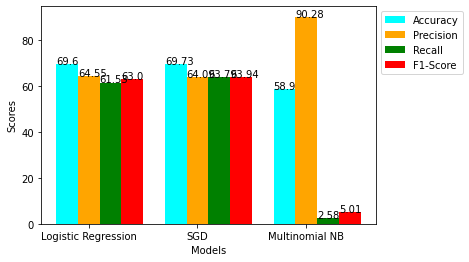

In [69]:
#Visualizing the results 
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# arranging the data
x = np.arange(3)
y1 = [acc_logreg, acc_SGD, acc_NB]
y2 = [prec_logreg, prec_SGD, prec_NB]
y3 = [recall_logreg, recall_SGD, recall_NB]
y4 = [f1_logreg, f1_SGD, f1_NB]
width = 0.2
  
# plot data in grouped manner of bar type
bars=plt.bar(x-0.2, y1, width, color='cyan')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x, y2, width, color='orange')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.2, y3, width, color='green')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.4, y4, width, color='red')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.xticks(x, ['Logistic Regression', 'SGD', 'Multinomial NB'])
plt.xlabel("Models")
plt.ylabel("Scores")
plt.legend(["Accuracy", "Precision", "Recall","F1-Score"],loc="best", bbox_to_anchor=(1, 1))

plt.show()

From the above results, we can see that the results for Logistic Regression and SGD have improved. But, overall SGD is having an F1 Score of 63.94% and Logistic Regression has 63% so SGD is performing better. The precision and recall for both the models are also fairly good. But, Multinomial NB is performing the same as it was performing before with Precision and Recall of 90% and almost 3%. The confusion matrix below will also give a good idea

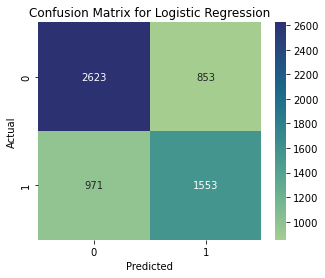

In [70]:
#Generating Confusion matrix
#importing libraries
import pandas as pd
import seaborn as sns
#Confusion Matrix
conf_matrix=pd.crosstab(pd.Series(y_test,name='Actual'),pd.Series(y_test_hat_logreg,name='Predicted'))
plt.figure(figsize=(5,4))
plt.title("Confusion Matrix for Logistic Regression")
sns.heatmap(conf_matrix,cmap='crest',annot=True,fmt='g')
plt.show()

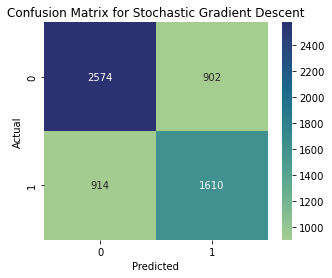

In [71]:
#Generating Confusion matrix
#importing libraries
import pandas as pd
import seaborn as sns
#Confusion Matrix
conf_matrix=pd.crosstab(pd.Series(y_test,name='Actual'),pd.Series(y_test_hat_SGD,name='Predicted'))
plt.figure(figsize=(5,4))
plt.title("Confusion Matrix for Stochastic Gradient Descent")
sns.heatmap(conf_matrix,cmap='crest',annot=True,fmt='g')
plt.show()

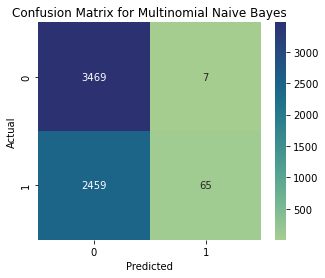

In [72]:
#Generating Confusion matrix
#importing libraries
import pandas as pd
import seaborn as sns
#Confusion Matrix
conf_matrix=pd.crosstab(pd.Series(y_test,name='Actual'),pd.Series(y_test_hat_NB,name='Predicted'))
plt.figure(figsize=(5,4))
plt.title("Confusion Matrix for Multinomial Naive Bayes")
sns.heatmap(conf_matrix,cmap='crest',annot=True,fmt='g')
plt.show()

<ul>
<li>The results for the Logistic Regression and SDG are almost the same as before</li>
<li>For Multinomial Naive Bayes, the True Positive rate decreased a little and the False Positive rate went up and the True positive rate went up and False Negative rate decreased. So overall, the model is having a tough time with correctly predicting the movies with the Drama Genre</li></ul>

## Iteration 3
<p>After, generating Trigrams, removing stopwords. The Models did improve a little, but now generating the best hyperparameters for the models to see the if the results will improve or not</p>

<b>1. Finding the best parameters for Logistic Regression</b>

In [73]:
#Using GridSearchCV to tune the hyperparameters of our model and find the best one
#importing libraries
from sklearn.model_selection import GridSearchCV,StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

# parameter grid
#C is a regularization paramters which will penalize the extreme values, because extreme values leads to overfitting
#solver is basically the optimizer
parameters = { 
    'C'       : [0.5,0.01,0.1,1,10,100,500,1000]
}

#Initializing the model
logreg_model=LogisticRegression(max_iter=1000,class_weight='balanced')

#Initializing the classifier
cv=StratifiedKFold(n_splits=5,random_state=0,shuffle=True)#will run the model for 10 times by dividing the data into 10 equal parts. In each split, 1 part would be used for testing and the rest of it would be used for training
classifier = GridSearchCV(logreg_model,       # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=cv)                     # number of folds

#Fitting our data to GridSearchCV Classifier and printing the best parameters and accuracy of the model with the best parameters
classifier.fit(X_train,y_train)
print("Best Parameters :",classifier.best_params_)
print("Accuracy :",classifier.best_score_)

Best Parameters : {'C': 10}
Accuracy : 0.6879285714285714


<b>2. Finding the best parameters for Multinomial Naive Bayes</b>

In [74]:
import warnings
warnings.filterwarnings('ignore')

#Grid Search with Stratified KFold

#defining the model
NB_model = MultinomialNB()

#defining the dictionary for the parameters parameters
#we have one hyperparameters here i.e alpha which is basically a smoothing parameters
parameters={'alpha':[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1,10,50,100]} 
cv=StratifiedKFold(n_splits=5,random_state=0,shuffle=True)
classifier=GridSearchCV(NB_model,parameters,cv=cv,scoring='accuracy',return_train_score=False)

#fitting on the GridSearchCV classifier
classifier.fit(X_train,y_train)

#Printing Best Parameters and Accuracy
print("Best Parameter :", classifier.best_params_)
print("Accuracy :", classifier.best_score_)

Best Parameter : {'alpha': 0.1}
Accuracy : 0.6654285714285715


<b>3. Finding the best parameters for Stochastic Gradient Descent</b>

In [75]:
import warnings
warnings.filterwarnings('ignore')

#initializing the model
SGD=SGDClassifier(class_weight='balanced')

#defining the dictionary for the parameters
#we have three hyperparameters here i.e max_iter,alpha, and loss
parameters={'max_iter' : [100,200,300,400,500,1000],
            'alpha' : [0.0001,0.001,0.01,0.1,0.05,0.5,1,10,50,100],
            'loss' : ['hinge','log_loss']
           } 
cv=StratifiedKFold(n_splits=5,random_state=0,shuffle=True)
classifier=GridSearchCV(SGD,parameters,cv=cv,scoring='accuracy',return_train_score=False)

#fitting on the GridSearchCV classifier
classifier.fit(X_train,y_train)

print("Best Parameter :", classifier.best_params_)
print("Accuracy :", classifier.best_score_)

Best Parameter : {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 300}
Accuracy : 0.6880714285714286


<b>Running all the models with the best hyperparameters and evaluating the results</b>

In [76]:
#removing the movie_Id from our testing data because that is not needed for the modelling
X_final= temp.iloc[:, 1].values

#Initializing the TF-IDF Vectorizor
vect=TfidfVectorizer(ngram_range=(1,3),stop_words='english')

#Fitting and generating a Sparse Matrix for the data
x=vect.fit_transform(X_final)



In [77]:
#importing required libraries for modelling
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

#Initializing the models with the best hyperparameters
logreg_model = LogisticRegression(max_iter=1000,C=10,class_weight='balanced')
SGD_model = SGDClassifier(alpha=0.0001,loss='hinge',max_iter=1000,class_weight='balanced')
NB_model = MultinomialNB(alpha=0.1)

#Splitting the data into train/test with a 70/30 split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

#fitting our models
logreg_model.fit(X_train,y_train)
SGD_model.fit(X_train,y_train)
NB_model.fit(X_train,y_train)

#Predicting the models
y_test_hat_logreg=logreg_model.predict(X_test)
y_test_hat_SGD=SGD_model.predict(X_test)
y_test_hat_NB=NB_model.predict(X_test)

#Calculating Accuracy, Precision and Recall scores
#For Logistic Regression
acc_logreg=round(accuracy_score(y_test,y_test_hat_logreg)*100,2)
prec_logreg=round(precision_score(y_test,y_test_hat_logreg)*100,2)
recall_logreg=round(recall_score(y_test,y_test_hat_logreg)*100,2)
f1_logreg=round(f1_score(y_test,y_test_hat_logreg)*100,2)

#For SGD
acc_SGD=round(accuracy_score(y_test,y_test_hat_SGD)*100,2)
prec_SGD=round(precision_score(y_test,y_test_hat_SGD)*100,2)
recall_SGD=round(recall_score(y_test,y_test_hat_SGD)*100,2)
f1_SGD=round(f1_score(y_test,y_test_hat_SGD)*100,2)

#For Naive Bayes
acc_NB=round(accuracy_score(y_test,y_test_hat_NB)*100,2)
prec_NB=round(precision_score(y_test,y_test_hat_NB)*100,2)
recall_NB=round(recall_score(y_test,y_test_hat_NB)*100,2)
f1_NB=round(f1_score(y_test,y_test_hat_NB)*100,2)


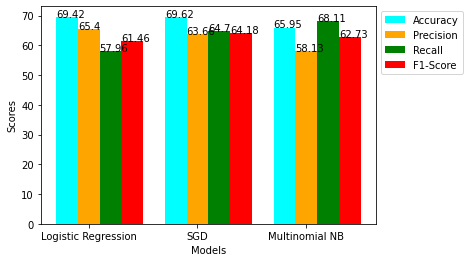

In [78]:
#Visualizing the results 
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# arranging the data
x = np.arange(3)
y1 = [acc_logreg, acc_SGD, acc_NB]
y2 = [prec_logreg, prec_SGD, prec_NB]
y3 = [recall_logreg, recall_SGD, recall_NB]
y4 = [f1_logreg, f1_SGD, f1_NB]
width = 0.2
  
# plot data in grouped manner of bar type
bars=plt.bar(x-0.2, y1, width, color='cyan')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x, y2, width, color='orange')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.2, y3, width, color='green')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.4, y4, width, color='red')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.xticks(x, ['Logistic Regression', 'SGD', 'Multinomial NB'])
plt.xlabel("Models")
plt.ylabel("Scores")
plt.legend(["Accuracy", "Precision", "Recall","F1-Score"],loc="best", bbox_to_anchor=(1, 1))

plt.show()

The results for Logistic Regression and SGD are almost the same after executing the models with the best Hyperparameters. But the results for Multinomial NB improved alot after initializing the model with the best Hyperparameters.Looking at the F1 score, the Multionomial NB is better then the other two but the recall is high while precision is not at the same level as the recall, showing that the model is returning majority of the relevant results but the precision shows that all of them are not that relevant

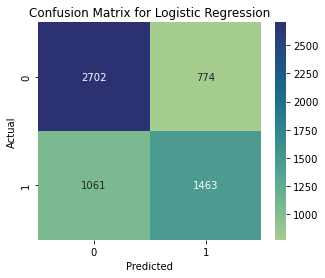

In [79]:
#Generating Confusion matrix
#importing libraries
import pandas as pd
import seaborn as sns
#Confusion Matrix
conf_matrix=pd.crosstab(pd.Series(y_test,name='Actual'),pd.Series(y_test_hat_logreg,name='Predicted'))
plt.figure(figsize=(5,4))
plt.title("Confusion Matrix for Logistic Regression")
sns.heatmap(conf_matrix,cmap='crest',annot=True,fmt='g')
plt.show()

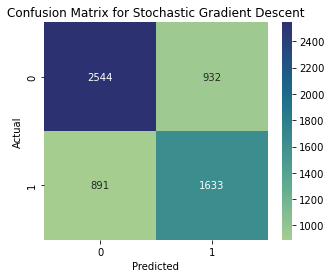

In [80]:
#Generating Confusion matrix
#importing libraries
import pandas as pd
import seaborn as sns
#Confusion Matrix
conf_matrix=pd.crosstab(pd.Series(y_test,name='Actual'),pd.Series(y_test_hat_SGD,name='Predicted'))
plt.figure(figsize=(5,4))
plt.title("Confusion Matrix for Stochastic Gradient Descent")
sns.heatmap(conf_matrix,cmap='crest',annot=True,fmt='g')
plt.show()

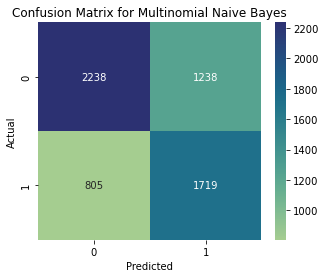

In [81]:
#Generating Confusion matrix
#importing libraries
import pandas as pd
import seaborn as sns
#Confusion Matrix
conf_matrix=pd.crosstab(pd.Series(y_test,name='Actual'),pd.Series(y_test_hat_NB,name='Predicted'))
plt.figure(figsize=(5,4))
plt.title("Confusion Matrix for Multinomial Naive Bayes")
sns.heatmap(conf_matrix,cmap='crest',annot=True,fmt='g')
plt.show()

<ul>
<li>The results for the Logistic Regression improved by 3-4% as compared to the earlier iteration and SDG also improved a little</li>
<li>For Multinomial Naive Bayes, the model had a big improvement. The True Positive went up to 1719 from 65 earlier that is a big improvement. Although, the False Negatives before were only 7, but now it went up to 1238 which is a very big jump. But that we can also see from the recall. The recall went up but the precision did go up that much, so much of the results are not that relevant which we can see.</li></ul>

## Iteration 4
<p>Lastly, I will try Lemmitization in addition to all the other steps performed in the earlier iterations, and see whether it improves the results or not</p>

In [82]:
#Initializing the lemmatizer, we are using spacy for lemmatization instead of NLTK because Spacy is new and performs better
#lemmatization
lemmatizer=spacy.load('en_core_web_sm')

#defining tokenizer
def my_tokenizer(doc):
    tokens=lemmatizer(doc)
    return([tokens.lemma_ for tokens in tokens])

#defining out own preprocessor that will convert everything to lowercase
def my_proprocessor(doc):
    return(doc.lower())

In [83]:
#applying lemmatiztion to our data
temp['story'] = temp.story.apply(my_tokenizer)

In [84]:
#converting the lemmatized data from a list to string
temp["story"] = temp["story"].apply(lambda x: str(x))

In [85]:
#removing punctuations i.e brackets [] and commas after converting a list to string.
temp['story'] = temp['story'].str.replace(r'[^\w\s]', '', regex=True)

In [86]:
#removing the movie_Id and DramaGenre from our training data because that is not needed, we only need story
X_final= temp.iloc[:, 1].values


from html import unescape
def my_preprocessor(doc):
    return(unescape(doc).lower())

#Initializing the TF-IDF Vectorizor
vect=TfidfVectorizer(preprocessor=my_preprocessor,ngram_range=(1,3),stop_words='english')

#Fitting and generating a Sparse Matrix for the data
x=vect.fit_transform(X_final)


In [87]:
#importing required libraries for modelling
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

#Initializing the models with the best hyperparameters
logreg_model = LogisticRegression(max_iter=1000,C=10,class_weight='balanced')
SGD_model = SGDClassifier(alpha=0.0001,loss='hinge',max_iter=1000,class_weight='balanced')
NB_model = MultinomialNB(alpha=0.1)

#Splitting the data into train/test with a 70/30 split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

#fitting our models
logreg_model.fit(X_train,y_train)
SGD_model.fit(X_train,y_train)
NB_model.fit(X_train,y_train)

#Predicting the models
y_test_hat_logreg=logreg_model.predict(X_test)
y_test_hat_SGD=SGD_model.predict(X_test)
y_test_hat_NB=NB_model.predict(X_test)

#Calculating Accuracy, Precision and Recall scores
#For Logistic Regression
acc_logreg=round(accuracy_score(y_test,y_test_hat_logreg)*100,2)
prec_logreg=round(precision_score(y_test,y_test_hat_logreg)*100,2)
recall_logreg=round(recall_score(y_test,y_test_hat_logreg)*100,2)
f1_logreg=round(f1_score(y_test,y_test_hat_logreg)*100,2)

#For SGD
acc_SGD=round(accuracy_score(y_test,y_test_hat_SGD)*100,2)
prec_SGD=round(precision_score(y_test,y_test_hat_SGD)*100,2)
recall_SGD=round(recall_score(y_test,y_test_hat_SGD)*100,2)
f1_SGD=round(f1_score(y_test,y_test_hat_SGD)*100,2)

#For Naive Bayes
acc_NB=round(accuracy_score(y_test,y_test_hat_NB)*100,2)
prec_NB=round(precision_score(y_test,y_test_hat_NB)*100,2)
recall_NB=round(recall_score(y_test,y_test_hat_NB)*100,2)
f1_NB=round(f1_score(y_test,y_test_hat_NB)*100,2)


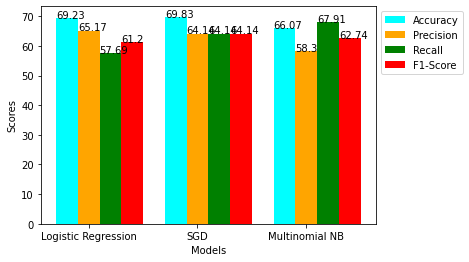

In [88]:
#Visualizing the results 
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# arranging the data
x = np.arange(3)
y1 = [acc_logreg, acc_SGD, acc_NB]
y2 = [prec_logreg, prec_SGD, prec_NB]
y3 = [recall_logreg, recall_SGD, recall_NB]
y4 = [f1_logreg, f1_SGD, f1_NB]
width = 0.2
  
# plot data in grouped manner of bar type
bars=plt.bar(x-0.2, y1, width, color='cyan')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x, y2, width, color='orange')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.2, y3, width, color='green')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.4, y4, width, color='red')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.xticks(x, ['Logistic Regression', 'SGD', 'Multinomial NB'])
plt.xlabel("Models")
plt.ylabel("Scores")
plt.legend(["Accuracy", "Precision", "Recall","F1-Score"],loc="best", bbox_to_anchor=(1, 1))

plt.show()

Looking at the above results, after performing lemmatization the results didn't improve and the performance decreased a little

## Conclusion
<p><b>After all the analysis, and looking at the Accuracy, Precision, Recall, F1 Scores and Confusion Matrix for each model. we can conclude that the best model for TF-IDF is Stocastic Gradient Descent, with the hyperparameters alpha=0.0001, loss='hinge', max_iter=1000, class_weight='balanced'. In addition to this, for getting the best results, irriguler texts from the data has to be removed using Regex, and for TD-IDF to perform better, trigrams should be generated and stopwords should be removed</b></p>

### 3. Topic Modelling
<ul> We have perfomed 2 iterations for the Topic Modelling. In each iteration different steps were performed to make the model better which is discussed below:
<li><b>Iteration 1 :</b>Firstly, the uncessary text was removed in the 'story' column using Regex. Then trigrams were generated and three model i.e. Logistic Regression, Stochastic Gradient Descent and Multinomial Naive Bayes were used for prediction.The hyperparameter 'class_weight' was used for balancing.</li>
    <li><b>Iteration 2 :</b>In addition to all the steps above, the Stopwords were removed and the models were run to see if there is any improvement or not.The best hyperparameters for our models were generated using GridSearch Cross Validation. And, then the models were trained using the best hyperparameters</li>
   </ul>

## Iteration 1:
<p> In this iteration, first we remove the unnecessary text and then we just calcule the trigrams and the rest, all the models are being implemented with their default settings</p>

To prepare the data, we import and initiate CountVectorizor. Then we transform it to fit our data.

In [89]:
# Preparing the data
from sklearn.feature_extraction.text import CountVectorizer 
vect = CountVectorizer(max_features = 10000,ngram_range=(1,3))
X = vect.fit_transform(main_dataset.story)

Next, we import LDA.

In [90]:
# Applying the LDA Method
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation() 
%time document_topics = lda.fit_transform(X)

CPU times: user 1min 14s, sys: 222 ms, total: 1min 15s
Wall time: 1min 15s


In [91]:
# Displaying the document topics array
document_topics

array([[2.32590604e-03, 2.32624375e-03, 2.32586925e-03, ...,
        7.28864722e-01, 2.32608940e-03, 2.32589928e-03],
       [6.99427733e-04, 8.28011531e-02, 6.99527538e-04, ...,
        6.99467003e-04, 6.99435618e-04, 6.99403923e-04],
       [1.96105461e-03, 1.96129190e-03, 1.96136476e-03, ...,
        1.96120555e-03, 5.29009466e-01, 1.96106466e-03],
       ...,
       [1.43370870e-01, 2.96643664e-01, 3.31033440e-01, ...,
        2.77832860e-03, 2.77815905e-03, 2.77844875e-03],
       [5.29986306e-01, 9.71071058e-04, 9.71070445e-04, ...,
        7.93079791e-02, 1.87816523e-01, 9.71218275e-04],
       [3.70484910e-03, 3.70461229e-03, 3.28943615e-01, ...,
        3.70436007e-03, 3.70470851e-03, 3.70481248e-03]])

Now that the data is ready, we can import our prediction models and see how they perform.

In [92]:
#importing required libraries for modelling
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

#Initializing the models
logreg_model = LogisticRegression(max_iter=1000,class_weight='balanced')
SGD_model = SGDClassifier(class_weight='balanced')
NB_model = MultinomialNB()

#Splitting the data into train/test with a 70/30 split
X_train,X_test,y_train,y_test=train_test_split(document_topics,y,test_size=0.3,random_state=0,stratify=y)

#fitting our models
logreg_model.fit(X_train,y_train)
SGD_model.fit(X_train,y_train)
NB_model.fit(X_train,y_train)

#Predicting the models
y_test_hat_logreg=logreg_model.predict(X_test)
y_test_hat_SGD=SGD_model.predict(X_test)
y_test_hat_NB=NB_model.predict(X_test)

#Calculating Accuracy, Precision and Recall scores
#For Logistic Regression
acc_logreg=round(accuracy_score(y_test,y_test_hat_logreg)*100,2)
prec_logreg=round(precision_score(y_test,y_test_hat_logreg)*100,2)
recall_logreg=round(recall_score(y_test,y_test_hat_logreg)*100,2)
f1_logreg=round(f1_score(y_test,y_test_hat_logreg)*100,2)

#For SGD
acc_SGD=round(accuracy_score(y_test,y_test_hat_SGD)*100,2)
prec_SGD=round(precision_score(y_test,y_test_hat_SGD)*100,2)
recall_SGD=round(recall_score(y_test,y_test_hat_SGD)*100,2)
f1_SGD=round(f1_score(y_test,y_test_hat_SGD)*100,2)

#For Naive Bayes
acc_NB=round(accuracy_score(y_test,y_test_hat_NB)*100,2)
prec_NB=round(precision_score(y_test,y_test_hat_NB)*100,2)
recall_NB=round(recall_score(y_test,y_test_hat_NB)*100,2)
f1_NB=round(f1_score(y_test,y_test_hat_NB)*100,2)


Then, we can visualize the results to compare the accuracies of our models. 

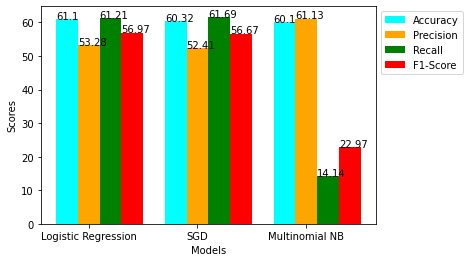

In [93]:
#Visualizing the results 
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# arranging the data
x = np.arange(3)
y1 = [acc_logreg, acc_SGD, acc_NB]
y2 = [prec_logreg, prec_SGD, prec_NB]
y3 = [recall_logreg, recall_SGD, recall_NB]
y4 = [f1_logreg, f1_SGD, f1_NB]
width = 0.2
  
# plot data in grouped manner of bar type
bars=plt.bar(x-0.2, y1, width, color='cyan')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x, y2, width, color='orange')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.2, y3, width, color='green')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.4, y4, width, color='red')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.xticks(x, ['Logistic Regression', 'SGD', 'Multinomial NB'])
plt.xlabel("Models")
plt.ylabel("Scores")
plt.legend(["Accuracy", "Precision", "Recall","F1-Score"],loc="best", bbox_to_anchor=(1, 1))

plt.show()

Our results show that Logistic Regression Models consistently performed the best while SGD wasn't too far behind. Let's see if we can improve the performance using hyperparameters

## Iteration 2:
<p>In this Iteration, we are generating the trigrams and removing the stopwards and checking the results of our models. We are using the best hyperparameters as well</p>

We need to see if we can improve the performance of our models. To do so, we can apply the best hyperparameters that was given to us via the gridsearch. 

In [96]:
# Preparing the data
from sklearn.feature_extraction.text import CountVectorizer 
vect = CountVectorizer(max_features = 10000, 
                       stop_words = "english",ngram_range=(1,3))
X = vect.fit_transform(main_dataset.story)

We specified number of components to be 5, set the learning method to be 'batch', and set the maximum iterations to 25. 

In [98]:
# Applying the LDA Method
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5, learning_method="batch",
                                max_iter=25, random_state=0) 
document_topics = lda.fit_transform(X)

In [99]:
# Displaying the document topics array
document_topics

array([[0.11759929, 0.71148332, 0.01291728, 0.01269018, 0.14530993],
       [0.0035114 , 0.00347417, 0.31901905, 0.55971092, 0.11428446],
       [0.96476861, 0.00879157, 0.00877832, 0.00885148, 0.00881002],
       ...,
       [0.01550518, 0.1272562 , 0.01621642, 0.64555553, 0.19546666],
       [0.18156407, 0.47009814, 0.00519066, 0.33788256, 0.00526457],
       [0.01074092, 0.17111791, 0.01074404, 0.79662452, 0.01077261]])

In [100]:
# Displaying the LDA components array
lda.components_

array([[11.04174655,  0.21134976, 17.78765967, ...,  0.20098377,
        41.69190529,  0.20176286],
       [42.81588515, 36.18965024,  0.20529338, ...,  0.20097318,
         0.20459709,  0.20303495],
       [34.28025792, 17.10691287,  0.20743218, ...,  0.2008463 ,
         7.85482186, 19.44975503],
       [25.65764874,  3.28933013, 26.5533928 , ...,  0.20120422,
         0.20228998, 11.94315536],
       [ 0.20446163,  0.20275701, 14.24622198, ..., 16.19599253,
        11.04638577,  0.20229181]])

In [101]:
#importing required libraries for modelling
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

#Initializing the models
logreg_model = LogisticRegression(max_iter=1000,class_weight='balanced')
SGD_model = SGDClassifier(class_weight='balanced')
NB_model = MultinomialNB()

#Splitting the data into train/test with a 70/30 split
X_train,X_test,y_train,y_test=train_test_split(document_topics,y,test_size=0.3,random_state=0,stratify=y)

#fitting our models
logreg_model.fit(X_train,y_train)
SGD_model.fit(X_train,y_train)
NB_model.fit(X_train,y_train)

#Predicting the models
y_test_hat_logreg=logreg_model.predict(X_test)
y_test_hat_SGD=SGD_model.predict(X_test)
y_test_hat_NB=NB_model.predict(X_test)

#Calculating Accuracy, Precision and Recall scores
#For Logistic Regression
acc_logreg=round(accuracy_score(y_test,y_test_hat_logreg)*100,2)
prec_logreg=round(precision_score(y_test,y_test_hat_logreg)*100,2)
recall_logreg=round(recall_score(y_test,y_test_hat_logreg)*100,2)
f1_logreg=round(f1_score(y_test,y_test_hat_logreg)*100,2)

#For SGD
acc_SGD=round(accuracy_score(y_test,y_test_hat_SGD)*100,2)
prec_SGD=round(precision_score(y_test,y_test_hat_SGD)*100,2)
recall_SGD=round(recall_score(y_test,y_test_hat_SGD)*100,2)
f1_SGD=round(f1_score(y_test,y_test_hat_SGD)*100,2)

#For Naive Bayes
acc_NB=round(accuracy_score(y_test,y_test_hat_NB)*100,2)
prec_NB=round(precision_score(y_test,y_test_hat_NB)*100,2)
recall_NB=round(recall_score(y_test,y_test_hat_NB)*100,2)
f1_NB=round(f1_score(y_test,y_test_hat_NB)*100,2)


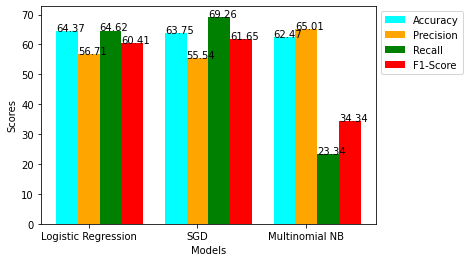

In [102]:
#Visualizing the results 
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# arranging the data
x = np.arange(3)
y1 = [acc_logreg, acc_SGD, acc_NB]
y2 = [prec_logreg, prec_SGD, prec_NB]
y3 = [recall_logreg, recall_SGD, recall_NB]
y4 = [f1_logreg, f1_SGD, f1_NB]
width = 0.2
  
# plot data in grouped manner of bar type
bars=plt.bar(x-0.2, y1, width, color='cyan')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x, y2, width, color='orange')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.2, y3, width, color='green')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.4, y4, width, color='red')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.xticks(x, ['Logistic Regression', 'SGD', 'Multinomial NB'])
plt.xlabel("Models")
plt.ylabel("Scores")
plt.legend(["Accuracy", "Precision", "Recall","F1-Score"],loc="best", bbox_to_anchor=(1, 1))

plt.show()

By applying the best hyperparameters, we noticed that the models' accuracies improved slighlty. In this iteration, Logistic Regression consistently performed the best and its best accuracy was 62.3%. However, SGD had the highest accuracy overall with 64.37%. Naive Bayes performed the worst with accuracy being at 62% but the Precision is 65% and recall is very low meaning that it is not even picking the right movies

### 4. Word Embedding
In this section we will reimplement our models and redo our itterations but using word embedding this time:

Iteration 1 :Firstly, We used word embedding using glove.6b.50d along with our split training data done before and three models were used i.e. Logistic Regression, Stochastic Gradient Descent and Multinomial Naive Bayes were used for prediction.The hyperparameter 'class_weight' was used for balancing.

Iteration 2 :In addition to all the steps above, the Stopwords were removed and the models were run to see if there is any improvement or not

Iteration 3 :We used the best hyperparameters for our models that were generated using GridSearch Cross Validation in the previous section. And, then the models were trained using the best hyperparameters

Iteration 4 :We tried running Word Embedding Technique with Random Forest



## Iteration 1

In this iteration we will be using word embedding with "glove.6b.50d) 50 dimensions on our split data without removing stop words. 

In [103]:
#Import the needed libabry
from tqdm import tqdm

In [297]:
embeddings_index = dict()
f = open('glove.6B.50d.txt' , encoding='utf-8')
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

400000it [00:05, 77580.55it/s]


In [298]:
#Import needed libraries 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#Import stop words from nltk 
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manug\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [299]:
#Import needed library
from tqdm import tqdm
embeddings = []
#perform word embedding using our trained X_Final 
for review in tqdm(X_final):
    base_embedding = np.zeros((50,))
    word_count = 0
    for token in word_tokenize(review):
        token = token.lower()
        try:
            base_embedding += embeddings_index[token]
            word_count +=1
        except:
            continue
    base_embedding = base_embedding/word_count
    embeddings.append(base_embedding)

100%|██████████| 20000/20000 [03:13<00:00, 103.15it/s]


In [300]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Convert embeddings to numpy array:
WE_data = np.array(embeddings)

#We get rid of the Nan data
WE_data=np.nan_to_num(WE_data)

#We will go through errors when trying to run a Naive bayes without scaling out data so we scale it and save it WE_data_scaled
WE_data_scaled = scaler.fit_transform(WE_data)

In [301]:
#importing required libraries for modelling
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

#Initializing the models
logreg_modelembed = LogisticRegression(max_iter=1000,class_weight='balanced')
SGD_modelembed = SGDClassifier(class_weight='balanced')


#Splitting the data into train/test with a 70/30 split
X_train,X_test,y_train,y_test=train_test_split(WE_data,y,test_size=0.3,random_state=0,stratify=y)

#fitting our models
logreg_model.fit(X_train,y_train)
SGD_model.fit(X_train,y_train)

#Predicting the models
y_test_hat_logreg=logreg_model.predict(X_test)
y_test_hat_SGD=SGD_model.predict(X_test)

#Calculating Accuracy, Precision and Recall scores
#For Logistic Regression
acc_logreg=round(accuracy_score(y_test,y_test_hat_logreg)*100,2)
prec_logreg=round(precision_score(y_test,y_test_hat_logreg)*100,2)
recall_logreg=round(recall_score(y_test,y_test_hat_logreg)*100,2)
f1_logreg=round(f1_score(y_test,y_test_hat_logreg)*100,2)

#For SGD
acc_SGD=round(accuracy_score(y_test,y_test_hat_SGD)*100,2)
prec_SGD=round(precision_score(y_test,y_test_hat_SGD)*100,2)
recall_SGD=round(recall_score(y_test,y_test_hat_SGD)*100,2)
f1_SGD=round(f1_score(y_test,y_test_hat_SGD)*100,2)


In [302]:
#We intialize our model
NB_model = MultinomialNB(alpha=0.1)

#Splitting the data into train/test with a 70/30 split
X_train,X_test,y_train,y_test=train_test_split(WE_data_scaled,y,test_size=0.3,random_state=0,stratify=y)

#We fit our model
NB_model.fit(X_train,y_train)

#Predict our model
y_test_hat_NB=NB_model.predict(X_test)


#For Naive Bayes
acc_NB=round(accuracy_score(y_test,y_test_hat_NB)*100,2)
prec_NB=round(precision_score(y_test,y_test_hat_NB)*100,2)
recall_NB=round(recall_score(y_test,y_test_hat_NB)*100,2)
f1_NB=round(f1_score(y_test,y_test_hat_NB)*100,2)

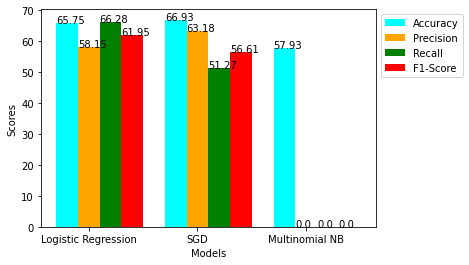

In [303]:
#Visualizing the results 
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# arranging the data
x = np.arange(3)
y1 = [acc_logreg, acc_SGD, acc_NB]
y2 = [prec_logreg, prec_SGD, prec_NB]
y3 = [recall_logreg, recall_SGD, recall_NB]
y4 = [f1_logreg, f1_SGD, f1_NB]
width = 0.2
  
# plot data in grouped manner of bar type
bars=plt.bar(x-0.2, y1, width, color='cyan')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x, y2, width, color='orange')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.2, y3, width, color='green')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.4, y4, width, color='red')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.xticks(x, ['Logistic Regression', 'SGD', 'Multinomial NB'])
plt.xlabel("Models")
plt.ylabel("Scores")
plt.legend(["Accuracy", "Precision", "Recall","F1-Score"],loc="best", bbox_to_anchor=(1, 1))

plt.show()

From the above results, we can see that Logistic Regression and SGD have almost the same performance. But, overall Logistic regrission is having an F1 Score of 62.68% and SGD has 58.41% so SGD is performing better. The precision is higher for SGD and the recall is way higher for Logistic regrission. But, Multinomial NB is performing very badly like the previous section and in this case because we used a scaler it's a very low number that is rounded to almost zero in precision, recall and F1. We have plotted the Confusion matrix for our top 2 performing models below to give as a clear view for our models.

Looking at the above confusion matrix we can see:
Both Logistic Regression and SGD the True Positive and the True Negatives are in a similer range and are performing good
On the other hand, we didn't plot a confusion matrix for Multinomial Naive Bayes because it's performing really bad.

## Iteration 2

In this itteration we will do the same as above but we will exclude the stop words and run the same model. 

In [156]:
#Import needed library
from tqdm import tqdm
embeddings = []
#perform word embedding using our trained X_Final 
for review in tqdm(X_final):
    base_embedding = np.zeros((50,))
    word_count = 0
    for token in word_tokenize(review):
        token = token.lower()
        #Get rid of the stop words
        if token in stopwords.words('english'):
            continue
        try:
            base_embedding += embeddings_index[token]
            word_count +=1
        except:
            continue
    base_embedding = base_embedding/word_count
    embeddings.append(base_embedding)

100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [03:03<00:00, 108.73it/s]


In [144]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Convert embeddings to numpy array:
WE_data = np.array(embeddings)

#We get rid of the Nan data
WE_data=np.nan_to_num(WE_data)

#We will go through errors when trying to run a Naive bayes without scaling out data so we scale it and save it Xnew2
WE_data_scaled = scaler.fit_transform(WE_data)

In [145]:
#importing required libraries for modelling
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

#Initializing the models
logreg_modelembed = LogisticRegression(max_iter=1000,class_weight='balanced')
SGD_modelembed = SGDClassifier(class_weight='balanced')


#Splitting the data into train/test with a 70/30 split
X_train,X_test,y_train,y_test=train_test_split(WE_data,y,test_size=0.3,random_state=0,stratify=y)

#fitting our models
logreg_model.fit(X_train,y_train)
SGD_model.fit(X_train,y_train)

#Predicting the models
y_test_hat_logreg=logreg_model.predict(X_test)
y_test_hat_SGD=SGD_model.predict(X_test)

#Calculating Accuracy, Precision and Recall scores
#For Logistic Regression
acc_logreg=round(accuracy_score(y_test,y_test_hat_logreg)*100,2)
prec_logreg=round(precision_score(y_test,y_test_hat_logreg)*100,2)
recall_logreg=round(recall_score(y_test,y_test_hat_logreg)*100,2)
f1_logreg=round(f1_score(y_test,y_test_hat_logreg)*100,2)

#For SGD
acc_SGD=round(accuracy_score(y_test,y_test_hat_SGD)*100,2)
prec_SGD=round(precision_score(y_test,y_test_hat_SGD)*100,2)
recall_SGD=round(recall_score(y_test,y_test_hat_SGD)*100,2)
f1_SGD=round(f1_score(y_test,y_test_hat_SGD)*100,2)


In [146]:
#We intialize our model
NB_model = MultinomialNB(alpha=0.1)

#Splitting the data into train/test with a 70/30 split
X_train,X_test,y_train,y_test=train_test_split(WE_data_scaled,y,test_size=0.3,random_state=0,stratify=y)

#We fit our model
NB_model.fit(X_train,y_train)

#Predict our model
y_test_hat_NB=NB_model.predict(X_test)


#For Naive Bayes
acc_NB=round(accuracy_score(y_test,y_test_hat_NB)*100,2)
prec_NB=round(precision_score(y_test,y_test_hat_NB)*100,2)
recall_NB=round(recall_score(y_test,y_test_hat_NB)*100,2)
f1_NB=round(f1_score(y_test,y_test_hat_NB)*100,2)

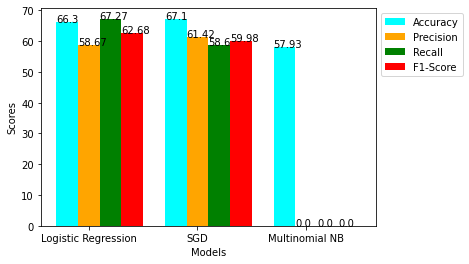

In [147]:
#Visualizing the results 
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# arranging the data
x = np.arange(3)
y1 = [acc_logreg, acc_SGD, acc_NB]
y2 = [prec_logreg, prec_SGD, prec_NB]
y3 = [recall_logreg, recall_SGD, recall_NB]
y4 = [f1_logreg, f1_SGD, f1_NB]
width = 0.2
  
# plot data in grouped manner of bar type
bars=plt.bar(x-0.2, y1, width, color='cyan')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x, y2, width, color='orange')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.2, y3, width, color='green')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.4, y4, width, color='red')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.xticks(x, ['Logistic Regression', 'SGD', 'Multinomial NB'])
plt.xlabel("Models")
plt.ylabel("Scores")
plt.legend(["Accuracy", "Precision", "Recall","F1-Score"],loc="best", bbox_to_anchor=(1, 1))

plt.show()

From the above results, we can see that the accuracy almost stayed the same but we have an improvement on the precision and recall for Logistic regrission and SGD. Overall SGD is having an F1 Score of 59.98% and Logistic Regression has 62.68% so Logistic regrission is performing better. But, Multinomial NB is performing the same as it was performing before. The confusion matrix below will also give a good idea

## Iteration 3 

We run the models like the previous step but using the best hyperparameters we found in the previous section. 

In [157]:
# Convert embeddings to numpy array:
WE_data = np.array(embeddings)

#We get rid of the Nan data
WE_data=np.nan_to_num(WE_data)

#We will go through errors when trying to run a Naive bayes without scaling out data so we scale it and save it Xnew2
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
WE_data_scaled = scaler.fit_transform(WE_data)

In [158]:
#importing required libraries for modelling
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

#Initializing the models with the best hyperparameters
logreg_model = LogisticRegression(max_iter=1000,C=10,class_weight='balanced')
SGD_model = SGDClassifier(alpha=0.0001,loss='hinge',max_iter=1000,class_weight='balanced')


#Splitting the data into train/test with a 70/30 split
X_train,X_test,y_train,y_test=train_test_split(WE_data,y,test_size=0.3,random_state=0,stratify=y)

#Splitting the data into train/test with a 70/30 split
X_train2,X_test2,y_train2,y_test2=train_test_split(WE_data_scaled,y,test_size=0.3,random_state=0,stratify=y)

#fitting our models
logreg_model.fit(X_train,y_train)
SGD_model.fit(X_train,y_train)


#Predicting the models
y_test_hat_logreg=logreg_model.predict(X_test)
y_test_hat_SGD=SGD_model.predict(X_test)

#Calculating Accuracy, Precision and Recall scores
#For Logistic Regression
acc_logreg=round(accuracy_score(y_test,y_test_hat_logreg)*100,2)
prec_logreg=round(precision_score(y_test,y_test_hat_logreg)*100,2)
recall_logreg=round(recall_score(y_test,y_test_hat_logreg)*100,2)
f1_logreg=round(f1_score(y_test,y_test_hat_logreg)*100,2)

#For SGD
acc_SGD=round(accuracy_score(y_test,y_test_hat_SGD)*100,2)
prec_SGD=round(precision_score(y_test,y_test_hat_SGD)*100,2)
recall_SGD=round(recall_score(y_test,y_test_hat_SGD)*100,2)
f1_SGD=round(f1_score(y_test,y_test_hat_SGD)*100,2)

#importing required libraries for modelling
from sklearn.naive_bayes import MultinomialNB

#Initializing the models with the best hyperparameters
NB_model = MultinomialNB(alpha=0.1)


#Fit our model
NB_model.fit(X_train2,y_train)

#Calculating Accuracy, Precision and Recall scores
#For Naive Bayes
acc_NB=round(accuracy_score(y_test,y_test_hat_NB)*100,2)
prec_NB=round(precision_score(y_test,y_test_hat_NB)*100,2)
recall_NB=round(recall_score(y_test,y_test_hat_NB)*100,2)
f1_NB=round(f1_score(y_test,y_test_hat_NB)*100,2)

In [162]:
#importing required libraries for modelling
from sklearn.naive_bayes import MultinomialNB

#Initializing the models with the best hyperparameters
NB_model = MultinomialNB(alpha=0.1)

#Splitting the data into train/test with a 70/30 split
X_train,X_test,y_train,y_test=train_test_split(WE_data_scaled,y,test_size=0.3,random_state=0,stratify=y)

#Fit our model
NB_model.fit(X_train,y_train)

#Preditct the model 
y_test_hat_NB=NB_model.predict(X_test)

#Calculating Accuracy, Precision and Recall scores
#For Naive Bayes
acc_NB=round(accuracy_score(y_test,y_test_hat_NB)*100,2)
prec_NB=round(precision_score(y_test,y_test_hat_NB)*100,2)
recall_NB=round(recall_score(y_test,y_test_hat_NB)*100,2)
f1_NB=round(f1_score(y_test,y_test_hat_NB)*100,2)

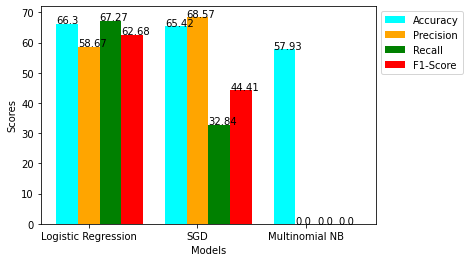

In [163]:
#Visualizing the results 
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# arranging the data
x = np.arange(3)
y1 = [acc_logreg, acc_SGD, acc_NB]
y2 = [prec_logreg, prec_SGD, prec_NB]
y3 = [recall_logreg, recall_SGD, recall_NB]
y4 = [f1_logreg, f1_SGD, f1_NB]
width = 0.2
  
# plot data in grouped manner of bar type
bars=plt.bar(x-0.2, y1, width, color='cyan')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x, y2, width, color='orange')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.2, y3, width, color='green')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.4, y4, width, color='red')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.xticks(x, ['Logistic Regression', 'SGD', 'Multinomial NB'])
plt.xlabel("Models")
plt.ylabel("Scores")
plt.legend(["Accuracy", "Precision", "Recall","F1-Score"],loc="best", bbox_to_anchor=(1, 1))

plt.show()

The results for Logistic Regression and SGD are almost the same after executing the models with the best Hyperparameters. The accuracy for SGD went up but the recall dropped significantly.Looking at the F1 score, we can see that the logisctic regrission is still performing the best with 62.68 and a major drop in SGD due to the recall drop as well. Below the confusion matrices.

## Iteration 4

In this itteration we tried running a random forest model using word embedding.

In [117]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Initialize our model 
RF_model = RandomForestClassifier(n_estimators=200, random_state=0)

#Splitting the data into train/test with a 70/30 split
X_train,X_test,y_train,y_test=train_test_split(WE_data,y,test_size=0.3,random_state=0,stratify=y)

#Fit our model
RF_model.fit(X_train,y_train)

#Predict the model
y_test_hat_RF = RF_model.predict(X_test)


#Calculating Accuracy, Precision and Recall scores
#For Random Forest
acc_RF=round(accuracy_score(y_test,y_test_hat_RF)*100,2)
prec_RF=round(precision_score(y_test,y_test_hat_RF)*100,2)
recall_RF=round(recall_score(y_test,y_test_hat_RF)*100,2)
f1_RF=round(f1_score(y_test,y_test_hat_RF)*100,2)

In [164]:
print(acc_RF)
print (prec_RF)
print (recall_RF)
print (f1_RF)

67.2
65.46
46.63
54.47


Looking at the the results for random forest and word embedding we can see that the accuracy and precision is high but the recall is not optimal. For the overall F1 score, it didn't perform well as it was 54.47% 

# Step 5 : Selecting the Best Model 

<p> <b>According to our Analysis TF-IDF with Stochastic Gradient Descent was performeing the best with Trigrams Generated, Stopwords removed, Irreguler text and Punctuations removed and the best hyperparameters that we got {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 300}</b></p>

In [167]:
#importing required libraries
#re is needed for using reguler expressions which would be used to remove certain parts of the text(story)
import re

#assiging main_dataset to a temporary variable
temp=main_dataset

#had to remove some weird text in the text like \xe2\x80\x98Yinzer\xe2\x80\x99, \xe2\x80\x99
temp['story'] = temp['story'].str.replace(r'\\[^\Ws]+', '', regex=True)
#removing punctuations
temp['story'] = temp['story'].str.replace(r'[^\w\s]', '', regex=True)

#removing the movie_Id and DramaGenre from our training data because that is not needed, we only need story
X_final= temp.iloc[:, 1].values

#Defining the Dependent variable y, which will contain DramaGenre
y = main_dataset.iloc[:, -1].values

#Initializing the TF-IDF Vectorizor
vect=TfidfVectorizer(ngram_range=(1,3),stop_words='english',max_features=90000)

#Fitting and generating a Sparse Matrix for the data
x=vect.fit_transform(X_final)

In [168]:
#Initializing the models

SGD_model = SGDClassifier(alpha=0.0001,loss='hinge',max_iter=300,class_weight='balanced')

#Splitting the data into train/test
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0,stratify=y)

#Training our model
SGD_model.fit(X_train,y_train)


SGDClassifier(class_weight='balanced', max_iter=300)

# Step 6 : Preparing the final Testing data


In [169]:
#merging the two df generated by only bringing the columns that we need(dropping one movieid because we already have movie_id) and also renaming the Drama column to DramaGenra
evaluation_dataset=pd.merge(movie_story_evaluation_file_data[['movie_id','story']],movies_data_final[['movieId','Drama']],left_on='movie_id',right_on='movieId',how='inner').drop(['movieId'],axis=1).rename(columns={"Drama": "DramaGenre"})
#printing the final dataset on which we are going to perform our analysis
evaluation_dataset

,movie_id,story,DramaGenre
0,122349,Growing up in the Mission district of San Fran...,1
1,122351,A soldier returns home from the Iraq war only ...,0
2,122361,Marco the Monkey works as a beach officer. But...,0
3,187901,"When an honest cop, Vijay Kumar\'s family is r...",0
4,187903,"Kathiresan aka Kaththi, a criminal, escapes fr...",1
...,...,...,...
3493,131062,"In the middle of nowhere, 20 years after an ap...",1
3494,131064,After living for years as a struggling artist ...,0
3495,131066,Ronal is a young barbarian with low self-estee...,0
3496,131068,"Ziege, H\xc3\xa4schen and Max have now moved t...",0


# Step 7 : Performing Prediction on the Final data

In [170]:
#importing required libraries
#re is needed for using reguler expressions which would be used to remove certain parts of the text(story)
import re

#assiging main_dataset to a temporary variable
test=evaluation_dataset

#had to remove some weird text in the text like \xe2\x80\x98Yinzer\xe2\x80\x99, \xe2\x80\x99
test['story'] = test['story'].str.replace(r'\\[^\Ws]+', '', regex=True)
#removing punctuations
test['story'] = test['story'].str.replace(r'[^\w\s]', '', regex=True)

test.head()

,movie_id,story,DramaGenre
0,122349,Growing up in the Mission district of San Fran...,1
1,122351,A soldier returns home from the Iraq war only ...,0
2,122361,Marco the Monkey works as a beach officer But ...,0
3,187901,When an honest cop Vijay Kumars family is ruth...,0
4,187903,Kathiresan aka Kaththi a criminal escapes from...,1


In [171]:
#removing the movie_Id from our testing data because that is not needed for the modelling
x= test.iloc[:, 1].values

#Defining the Dependent variable y, which will contain DramaGenre
y=test.iloc[:,2].values

#Initializing the TF-IDF Vectorizor
vect=TfidfVectorizer(ngram_range=(1,3),stop_words='english',max_features=90000)

#Fitting and generating a Sparse Matrix for the data
x=vect.fit_transform(x)

In [174]:
y_test_hat=SGD_model.predict(x)

# Step 8 : Printing the final scores

In [176]:
#For SGD
acc_SGD=round(accuracy_score(y,y_test_hat)*100,2)
prec_SGD=round(precision_score(y,y_test_hat)*100,2)
recall_SGD=round(recall_score(y,y_test_hat)*100,2)
f1_SGD=round(f1_score(y,y_test_hat)*100,2)

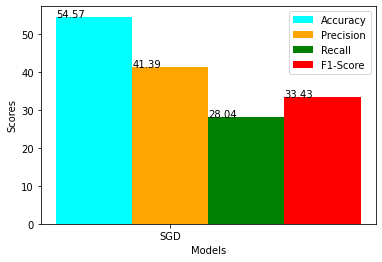

In [178]:
#Visualizing the results 
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# arranging the data
x = np.arange(1)
y1 = [acc_SGD]
y2 = [prec_SGD]
y3 = [recall_SGD]
y4 = [f1_SGD]
width = 0.2
  
# plot data in grouped manner of bar type
bars=plt.bar(x-0.2, y1, width, color='cyan')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x, y2, width, color='orange')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.2, y3, width, color='green')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
bars=plt.bar(x+0.4, y4, width, color='red')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.xticks(x, [ 'SGD'])
plt.xlabel("Models")
plt.ylabel("Scores")
plt.legend(["Accuracy", "Precision", "Recall","F1-Score"],loc="best", bbox_to_anchor=(1, 1))

plt.show()

# Extra Task : Applying Oversampling and Undersampling on the data:

In [391]:
main_dataset.head()

,movie_id,story,DramaGenre
0,131072,a girl who always tend to fall in love with th...,0
1,196609,bigfoot have come to the town of Ellwood City ...,0
2,131074,at an altitude of 18000 foot Alaskas Mount St ...,0
3,196611,in her first special since 2003 Ellen revisit ...,0
4,196613,Mike and Sulley be back at Monsters University...,0


Cleaning the data removing Punctuation, removing the stopwords, using Tf-idf vectorizer as that iteration was giving better performance in previous analysis, using stemming in one iteration and using lemmatization in one iteration. we check where the we can classify better. 

# Lemmatization

In [510]:
#importing required libraries
#re is needed for using reguler expressions which would be used to remove certain parts of the text(story)
import re
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
stopword_list = list(STOP_WORDS)

#assiging main_dataset to a temporary variable
processed_data= main_dataset

#had to remove some weird text in the text like \xe2\x80\x98Yinzer\xe2\x80\x99, \xe2\x80\x99
processed_data['story'] = processed_data['story'].str.replace(r'\\[^\Ws]+', '', regex=True)
#removing punctuations
processed_data['story'] = processed_data['story'].str.replace(r'[^\w\s]', '', regex=True)

processed_data.head()

nlp_en = spacy.load('en_core_web_sm')
def preprocess(text):
    text = text.lower() #normalize text
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    docs = nlp_en(text)
    #lemmatize and remove stopwords
    word_list = [doc.lemma_ for doc in docs if doc.text 
                            not in stopword_list ]
    text = " ".join(word_list)
    return text

processed_data['lemmatized_S'] = processed_data['story'].apply(preprocess)
processed_data.head()

,movie_id,story,DramaGenre,lemmatized_S,Stemmed_S
0,131072,a girl who always tend to fall in love with th...,0,girl tend fall love wrong guy meet believe wor...,girl alway tend fall love wrong guy meet belie...
1,196609,bigfoot have come to the town of Ellwood City ...,0,bigfoot come town ellwood city pa cause big pr...,bigfoot come town ellwood citi pa caus big pro...
2,131074,at an altitude of 18000 foot Alaskas Mount St ...,0,altitude foot alaskas mount st elias de...,altitud foot alaska mount st elia destin trio ...
3,196611,in her first special since 2003 Ellen revisit ...,0,special ellen revisit road stardom detai...,special sinc ellen revisit road stardom detail...
4,196613,Mike and Sulley be back at Monsters University...,0,mike sulley monster university funfille weeken...,mike sulley monster univers funfil weekend ooz...


# Stemming

In [511]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
# instantiate nltk's Porter stemmer 
stemmer = PorterStemmer()
def preprocess_s(text):
    text = text.lower() #normalize text
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    tokens = word_tokenize(text)
    docs = [stemmer.stem(token) for token in tokens]
    word_list = [doc for doc in docs if doc
                            not in stopword_list ]
    text = " ".join(word_list)
    return text
processed_data['Stemmed_S'] = processed_data['story'].apply(preprocess_s)
processed_data.head()

,movie_id,story,DramaGenre,lemmatized_S,Stemmed_S
0,131072,a girl who always tend to fall in love with th...,0,girl tend fall love wrong guy meet believe wor...,girl alway tend fall love wrong guy meet belie...
1,196609,bigfoot have come to the town of Ellwood City ...,0,bigfoot come town ellwood city pa cause big pr...,bigfoot come town ellwood citi pa caus big pro...
2,131074,at an altitude of 18000 foot Alaskas Mount St ...,0,altitude foot alaskas mount st elias de...,altitud foot alaska mount st elia destin trio ...
3,196611,in her first special since 2003 Ellen revisit ...,0,special ellen revisit road stardom detai...,special sinc ellen revisit road stardom detail...
4,196613,Mike and Sulley be back at Monsters University...,0,mike sulley monster university funfille weeken...,mike sulley monster univers funfil weekend ooz...


Transforming the data using Ti-Idf vectorizer

In [512]:
X_lemma = processed_data['lemmatized_S']
X_Stem = processed_data['Stemmed_S']
#Initializing the TF-IDF Vectorizor
vect=TfidfVectorizer(ngram_range=(1,3),stop_words='english',max_features=90000)

#Fitting and generating a Sparse Matrix for the data
x_lemma=vect.fit_transform(X_lemma)

x_lemma.shape

x_stem = vect.fit_transform(X_Stem)
x_stem.shape

(20000, 90000)

In [513]:
y_processed= processed_data['DramaGenre']

# OverSampling 

Oversampling is defined as adding more copies of the minority class to create a balanced dataset. When you don't have a lot of data to work with, oversampling is a good option. One class is plentiful, or the majority, while the other is uncommon, or the minority. When the data is insufficient, this technique tries to increase the size of rare samples to create a balance.

In [514]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
ros = RandomOverSampler(random_state=100)
X_ros, y_ros= ros.fit_resample(x_lemma, y_processed)
print(X_ros.shape,y_ros.shape)
smote = SMOTE(random_state=100)
X_smote, y_smote= smote.fit_resample(x_lemma, y_processed)
print(X_smote.shape,y_smote.shape)

X_ros_stem, y_ros_stem= ros.fit_resample(x_stem, y_processed)
print(X_ros_stem.shape,y_ros_stem.shape)
X_smote_stem, y_smote_stem= smote.fit_resample(x_stem, y_processed)
print(X_smote_stem.shape,y_smote_stem.shape)

(23176, 90000) (23176,)
(23176, 90000) (23176,)
(23176, 90000) (23176,)
(23176, 90000) (23176,)


# UnderSampling

Undersampling is a technique for balancing uneven datasets by retaining all data in the minority class while decreasing the size of the majority class. It is one of several techniques available to data scientists for extracting more accurate information from initially imbalanced datasets. Despite its drawbacks, such as the loss of potentially important data, it is still a common and important skill for data scientists.

In [515]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus= rus.fit_resample(x_lemma, y_processed)
nearmiss = NearMiss(version=3)
X_nearmiss, y_nearmiss= nearmiss.fit_resample(x_lemma, y_processed)

X_rus_stem, y_rus_stem= rus.fit_resample(x_stem, y_processed)
nearmiss = NearMiss(version=3)
X_nearmiss_stem, y_nearmiss_stem= nearmiss.fit_resample(x_stem, y_processed)

In [516]:
print(X_rus.shape,y_rus.shape)
print(X_nearmiss.shape,y_nearmiss.shape)
print(X_rus_stem.shape,y_rus_stem.shape)
print(X_nearmiss_stem.shape,y_nearmiss_stem.shape)

(16824, 90000) (16824,)
(13137, 90000) (13137,)
(16824, 90000) (16824,)
(13199, 90000) (13199,)


Model trainging on all he four datasets with two different text techniques formed in the previous steps. Total 8 different sets and doing cross validation with different hyperparameters. Accuracy on test data printed below each model 

In [546]:
X_train_ros,X_test_ros,y_train_ros,y_test_ros=train_test_split(X_ros,y_ros,test_size=0.3,random_state=0,stratify=y_ros)

warnings.filterwarnings('ignore')

#initializing the model
SGD=SGDClassifier(random_state=0)

#defining the dictionary for the parameters
#we have three hyperparameters here i.e max_iter,alpha, and loss
parameters={'max_iter' : [100,500,1000,3000,5000],
            'alpha' : [0.0001,0.01,0.00005,900,1],
            'loss' : ['hinge','log_loss','modified_huber']
           } 
cv=StratifiedKFold(n_splits=5,random_state=0,shuffle=True)
classifier=GridSearchCV(SGD,parameters,cv=cv,scoring='accuracy',return_train_score=False)

#fitting on the GridSearchCV classifier
M_ros = classifier.fit(X_train_ros,y_train_ros)


print("Best Parameter :", classifier.best_params_)
print("Accuracy :", classifier.best_score_)

Best Parameter : {'alpha': 5e-05, 'loss': 'log_loss', 'max_iter': 100}
Accuracy : 0.7292117057637759


In [547]:
y_hat_ros = M_ros.predict(X_test_ros)
print(accuracy_score(y_test_ros,y_hat_ros)*100,2)

73.36401553286352 2


In [548]:
X_train_smote,X_test_smote,y_train_smote,y_test_smote=train_test_split(X_smote,y_smote,test_size=0.3,random_state=0,stratify=y_smote)

warnings.filterwarnings('ignore')

#initializing the model
SGD=SGDClassifier()

#defining the dictionary for the parameters
#we have three hyperparameters here i.e max_iter,alpha, and loss
parameters={'max_iter' : [100,500,1000,3000,5000],
            'alpha' : [0.0001,0.01,0.00005,0.000009,1],
            'loss' : ['hinge','log_loss','modified_huber']
           } 
cv=StratifiedKFold(n_splits=5,random_state=0,shuffle=True)
classifier=GridSearchCV(SGD,parameters,cv=cv,scoring='accuracy',return_train_score=False)

#fitting on the GridSearchCV classifier
M_smote = classifier.fit(X_train_smote,y_train_smote)

print("Best Parameter :", classifier.best_params_)
print("Accuracy :", classifier.best_score_)

Best Parameter : {'alpha': 9e-06, 'loss': 'log_loss', 'max_iter': 5000}
Accuracy : 0.7374103002057609


In [549]:
y_hat_smote= M_smote.predict(X_test_smote)
print(accuracy_score(y_test_smote,y_hat_smote)*100,2)

74.22695239464979 2


In [545]:
X_train_ros_stem,X_test_ros_stem,y_train_ros_stem,y_test_ros_stem=train_test_split(X_ros_stem,y_ros_stem,test_size=0.3,random_state=0,stratify=y_ros_stem)

warnings.filterwarnings('ignore')

#initializing the model
SGD=SGDClassifier()

#defining the dictionary for the parameters
#we have three hyperparameters here i.e max_iter,alpha, and loss
parameters={'max_iter' : [100,500,1000,3000,5000],
            'alpha' : [0.0001,0.01,0.00005,0.000009,1],
            'loss' : ['hinge','log_loss','modified_huber']
           } 
cv=StratifiedKFold(n_splits=5,random_state=0,shuffle=True)
classifier=GridSearchCV(SGD,parameters,cv=cv,scoring='accuracy',return_train_score=False)

#fitting on the GridSearchCV classifier
M_ros_stem = classifier.fit(X_train_ros_stem,y_train_ros_stem)

print("Best Parameter :", classifier.best_params_)
print("Accuracy :", classifier.best_score_)

Best Parameter : {'alpha': 9e-06, 'loss': 'log_loss', 'max_iter': 5000}
Accuracy : 0.7327863791206808


In [550]:
y_hat_smote= M_ros_stem.predict(X_test_ros_stem)
print(accuracy_score(y_test_ros_stem,y_hat_smote)*100,2)

75.23371206673379 2


In [551]:
X_train_smote_stem,X_test_smote_stem,y_train_smote_stem,y_test_smote_stem=train_test_split(X_smote_stem,y_smote_stem,test_size=0.3,random_state=0,stratify=y_smote_stem)

warnings.filterwarnings('ignore')

#initializing the model
SGD=SGDClassifier()

#defining the dictionary for the parameters
#we have three hyperparameters here i.e max_iter,alpha, and loss
parameters={'max_iter' : [100,500,1000,3000,5000],
            'alpha' : [0.0001,0.01,0.00005,0.000009,1],
            'loss' : ['hinge','log_loss','modified_huber']
           } 
cv=StratifiedKFold(n_splits=5,random_state=0,shuffle=True)
classifier=GridSearchCV(SGD,parameters,cv=cv,scoring='accuracy',return_train_score=False)

#fitting on the GridSearchCV classifier
M_smote_stem = classifier.fit(X_train_ros_stem,y_train_ros_stem)

print("Best Parameter :", classifier.best_params_)
print("Accuracy :", classifier.best_score_)

Best Parameter : {'alpha': 9e-06, 'loss': 'log_loss', 'max_iter': 3000}
Accuracy : 0.7334643642215377


In [552]:
y_hat_smote= M_smote_stem.predict(X_test_smote_stem)
print(accuracy_score(y_test_smote_stem,y_hat_smote)*100,2)

74.78786135481087 2


In [553]:
X_train_rus_stem,X_test_rus_stem,y_train_rus_stem,y_test_rus_stem=train_test_split(X_rus_stem,y_rus_stem,test_size=0.3,random_state=0,stratify=y_rus_stem)

warnings.filterwarnings('ignore')

#initializing the model
SGD=SGDClassifier()

#defining the dictionary for the parameters
#we have three hyperparameters here i.e max_iter,alpha, and loss
parameters={'max_iter' : [100,500,1000,3000,5000],
            'alpha' : [0.0001,0.01,0.00005,0.000009,1],
            'loss' : ['hinge','log_loss','modified_huber']
           } 
cv=StratifiedKFold(n_splits=5,random_state=0,shuffle=True)
classifier=GridSearchCV(SGD,parameters,cv=cv,scoring='accuracy',return_train_score=False)

#fitting on the GridSearchCV classifier
M_Rus_stem = classifier.fit(X_train_rus_stem,y_train_rus_stem)

print("Best Parameter :", classifier.best_params_)
print("Accuracy :", classifier.best_score_)

Best Parameter : {'alpha': 0.0001, 'loss': 'log_loss', 'max_iter': 1000}
Accuracy : 0.6885180899649987


In [554]:
y_hat_smote= M_Rus_stem.predict(X_test_rus_stem)
print(accuracy_score(y_test_rus_stem,y_hat_smote)*100,2)

68.79952456418383 2


In [559]:
X_train_nearmiss_stem,X_test_nearmiss_stem,y_train_nearmiss_stem,y_test_nearmiss_stem=train_test_split(X_nearmiss_stem,y_nearmiss_stem,test_size=0.3,random_state=0,stratify=y_nearmiss_stem)

warnings.filterwarnings('ignore')

#initializing the model
SGD=SGDClassifier()

#defining the dictionary for the parameters
#we have three hyperparameters here i.e max_iter,alpha, and loss
parameters={'max_iter' : [100,500,1000,3000,5000],
            'alpha' : [0.0001,0.01,0.00005,0.000009,1],
            'loss' : ['hinge','log_loss','modified_huber']
           } 
cv=StratifiedKFold(n_splits=5,random_state=0,shuffle=True)
classifier=GridSearchCV(SGD,parameters,cv=cv,scoring='accuracy',return_train_score=False)

#fitting on the GridSearchCV classifier
M_nearmiss_stem = classifier.fit(X_train_nearmiss_stem,y_train_nearmiss_stem)

print("Best Parameter :", classifier.best_params_)
print("Accuracy :", classifier.best_score_)

Best Parameter : {'alpha': 0.0001, 'loss': 'log_loss', 'max_iter': 1000}
Accuracy : 0.6738815957549038


In [563]:
y_hat_nearmiss= M_nearmiss_stem.predict(X_test_nearmiss_stem)
print(accuracy_score(y_test_nearmiss_stem,y_hat_nearmiss)*100,2)

66.89393939393939 2


In [564]:
X_train_nearmiss,X_test_nearmiss,y_train_nearmiss,y_test_nearmiss=train_test_split(X_nearmiss,y_nearmiss,test_size=0.3,random_state=0,stratify=y_nearmiss)

warnings.filterwarnings('ignore')

#initializing the model
SGD=SGDClassifier()

#defining the dictionary for the parameters
#we have three hyperparameters here i.e max_iter,alpha, and loss
parameters={'max_iter' : [100,500,1000,3000,5000],
            'alpha' : [0.0001,0.01,0.00005,0.000009,1],
            'loss' : ['hinge','log_loss','modified_huber']
           } 
cv=StratifiedKFold(n_splits=5,random_state=0,shuffle=True)
classifier=GridSearchCV(SGD,parameters,cv=cv,scoring='accuracy',return_train_score=False)

#fitting on the GridSearchCV classifier
M_nearmiss = classifier.fit(X_train_nearmiss,y_train_nearmiss)

print("Best Parameter :", classifier.best_params_)
print("Accuracy :", classifier.best_score_)

Best Parameter : {'alpha': 0.0001, 'loss': 'log_loss', 'max_iter': 1000}
Accuracy : 0.6729744426318651


In [565]:
y_hat_near= M_nearmiss.predict(X_test_nearmiss)
print(accuracy_score(y_test_nearmiss,y_hat_near)*100,2)

67.57990867579909 2


In [566]:
X_train_rus,X_test_rus,y_train_rus,y_test_rus=train_test_split(X_rus,y_rus,test_size=0.3,random_state=0,stratify=y_rus)

warnings.filterwarnings('ignore')

#initializing the model
SGD=SGDClassifier()

#defining the dictionary for the parameters
#we have three hyperparameters here i.e max_iter,alpha, and loss
parameters={'max_iter' : [100,500,1000,3000,5000],
            'alpha' : [0.0001,0.01,0.00005,0.000009,1],
            'loss' : ['hinge','log_loss','modified_huber']
           } 
cv=StratifiedKFold(n_splits=5,random_state=0,shuffle=True)
classifier=GridSearchCV(SGD,parameters,cv=cv,scoring='accuracy',return_train_score=False)

#fitting on the GridSearchCV classifier
M_Rus = classifier.fit(X_train_rus,y_train_rus)

print("Best Parameter :", classifier.best_params_)
print("Accuracy :", classifier.best_score_)

Best Parameter : {'alpha': 0.0001, 'loss': 'log_loss', 'max_iter': 5000}
Accuracy : 0.6885176934528637


In [567]:
y_hat_rus= M_Rus.predict(X_test_rus)
print(accuracy_score(y_test_rus,y_hat_rus)*100,2)

69.07686212361331 2


# Testing on models built on sampling techniques

We perform same preprocessing on the test data before predicting using the models

In [521]:
test.head()
test['lemmatized_S'] = test['story'].apply(preprocess)
test.head()

,movie_id,story,DramaGenre,lemmatized_S,Stemmed_S
0,122349,Growing up in the Mission district of San Fran...,1,grow mission district san francisco che rivera...,growing up in the mission district of san fran...
1,122351,A soldier returns home from the Iraq war only ...,0,soldier return home iraq war haunt vision dead,a soldier returns home from the iraq war only ...
2,122361,Marco the Monkey works as a beach officer But ...,0,marco monkey work beach officer spend time try...,marco the monkey works as a beach officer but ...
3,187901,When an honest cop Vijay Kumars family is ruth...,0,honest cop vijay kumar family ruthlessly slaug...,when an honest cop vijay kumars family is ruth...
4,187903,Kathiresan aka Kaththi a criminal escapes from...,1,kathiresan aka kaththi criminal escape kolkata...,kathiresan aka kaththi a criminal escapes from...


In [522]:
test['Stemmed_S'] = test['story'].apply(preprocess_s)
test.head()

,movie_id,story,DramaGenre,lemmatized_S,Stemmed_S
0,122349,Growing up in the Mission district of San Fran...,1,grow mission district san francisco che rivera...,grow mission district san francisco che rivera...
1,122351,A soldier returns home from the Iraq war only ...,0,soldier return home iraq war haunt vision dead,soldier return home iraq war onli haunt vision...
2,122361,Marco the Monkey works as a beach officer But ...,0,marco monkey work beach officer spend time try...,marco monkey work beach offic spend hi time tr...
3,187901,When an honest cop Vijay Kumars family is ruth...,0,honest cop vijay kumar family ruthlessly slaug...,honest cop vijay kumar famili ruthlessli slaug...
4,187903,Kathiresan aka Kaththi a criminal escapes from...,1,kathiresan aka kaththi criminal escape kolkata...,kathiresan aka kaththi crimin escap kolkata pr...


In [555]:
test['DramaGenre'].value_counts()

0    2075
1    1423
Name: DramaGenre, dtype: int64

In [524]:
X_lemma = test['lemmatized_S']
X_Stem = test['Stemmed_S']
y_test = test['DramaGenre']
x_test_lemma=vect.fit_transform(X_lemma)

print(x_test_lemma.shape)

x_test_stem = vect.fit_transform(X_Stem)
print(x_test_stem.shape)

(3498, 90000)
(3498, 90000)


Predicting using all the eight models 

In [568]:
y_hat_1 = M_ros.predict(x_test_lemma)
y_hat_2 = M_smote.predict(x_test_lemma)
y_hat_3 = M_ros_stem.predict(x_test_stem)
y_hat_4 = M_smote_stem.predict(x_test_stem)`
y_hat_5 = M_Rus_stem.predict(x_test_stem)
y_hat_6 = M_nearmiss_stem.predict(x_test_stem)
y_hat_7 = M_nearmiss.predict(x_test_stem)
y_hat_8 = M_Rus.predict(x_test_stem)

In [569]:
print(accuracy_score(y_test,y_hat_1)*100)
print(accuracy_score(y_test,y_hat_2)*100)
print(accuracy_score(y_test,y_hat_3)*100)
print(accuracy_score(y_test,y_hat_4)*100)
print(accuracy_score(y_test,y_hat_5)*100)
print(accuracy_score(y_test,y_hat_6)*100)
print(accuracy_score(y_test,y_hat_7)*100)
print(accuracy_score(y_test,y_hat_8)*100)

56.20354488279017
46.79817038307604
54.4882790165809
54.17381360777587
58.061749571183526
41.509433962264154
40.79473985134363
55.57461406518011


Highest accuracy for test data is achieved using Random under sampling and stemming technique. Oversampling is performaning good on training data but when we predict using test data there is high varaince.